In [1]:
from projector_func import getVector, make_image
from PIL import Image
import torch
from model import Generator
import matplotlib.pyplot as plt
from alignFace import *

In [70]:
# imgfile = '/home/vk352/FaceDetection/datasets/celeba/Img_cropped/test/1740/081768.jpg'
# 29981, 19917
imgfile = '/home/vk352/FaceDetection/datasets/data1024x1024/19917.jpg'

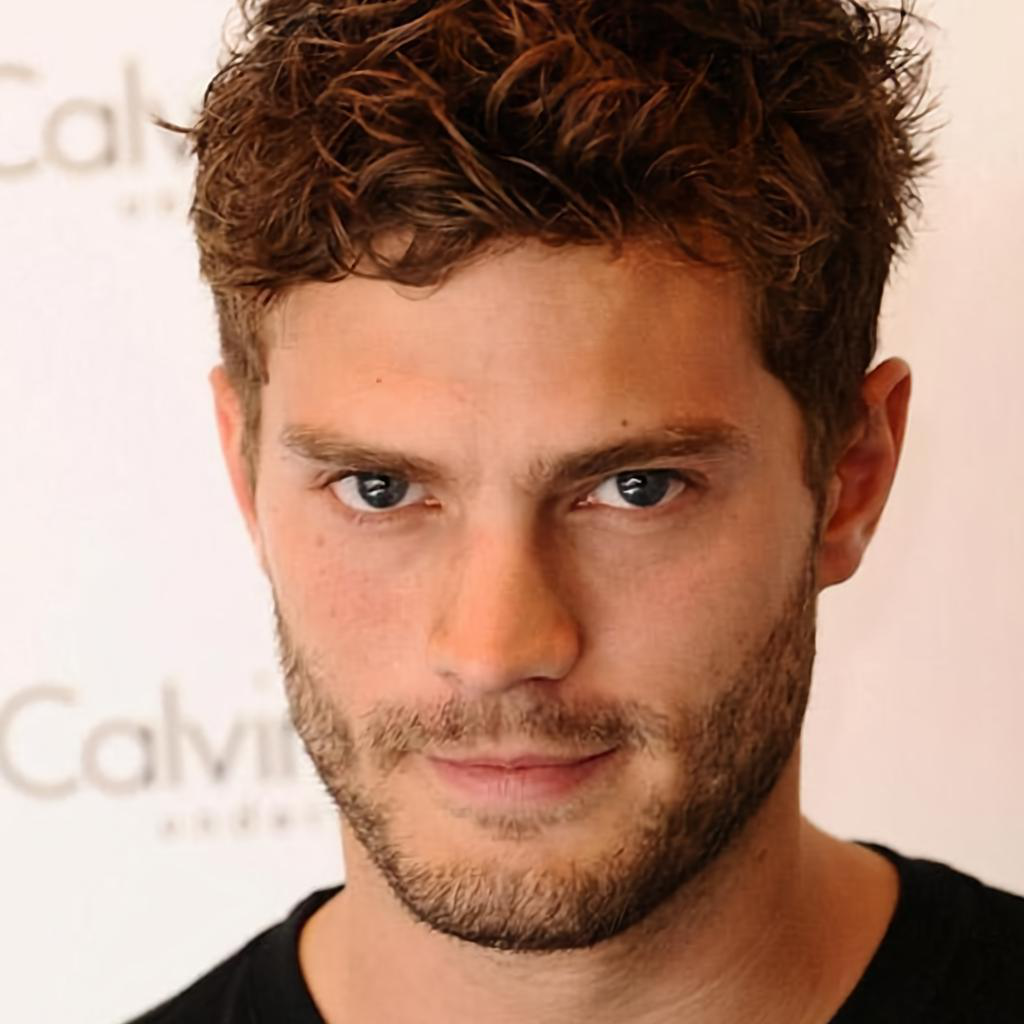

In [71]:
Image.open(imgfile).convert("RGB")

In [5]:
# g_ema, latent_path, noises = getVector('stylegan2-ffhq-config-f.pt', 1024, 
#                                        [imgfile])

Setting up Perceptual loss...


  0%|          | 0/1000 [00:00<?, ?it/s]

Loading model from: /home/vk352/FaceDetection/stylegan2-pytorch/lpips/weights/v0.1/vgg.pth
...[net-lin [vgg]] initialized
...Done


perceptual: 0.5296; noise regularize: 0.0925; mse: 0.3049; lr: 0.0000: 100%|██████████| 1000/1000 [02:37<00:00,  6.37it/s]


In [2]:
ckpt = 'stylegan2-ffhq-config-f.pt'
device = "cuda"
g_ema = Generator(1024, 512, 8)
g_ema.load_state_dict(torch.load(ckpt)["g_ema"], strict=False)
g_ema.eval()
g_ema = g_ema.to(device)

In [72]:
a = torch.load('results/19917.pt')

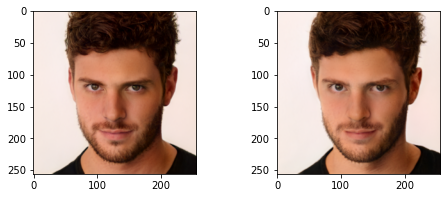

In [75]:
im1 = displayImg(g_ema, a['/home/vk352/FaceDetection/datasets/data1024x1024/19917.jpg']['path'][2]).resize((256,256))
im2 = displayImg(g_ema, a['/home/vk352/FaceDetection/datasets/data1024x1024/19917.jpg']['path'][-1]).resize((256,256))

plt.rcParams["figure.figsize"] = (8,3)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(im1)
axarr[1].imshow(im2)

In [3]:
def interpolate_hypersphere(v1, v2, num_steps):
    v1_norm = torch.norm(v1)
    v2_norm = torch.norm(v2)
    v2_normalized = v2 * (v1_norm / v2_norm)

    vectors = []
    for step in range(num_steps):
        interpolated = v1 + (v2_normalized - v1) * step / (num_steps - 1)
        interpolated_norm = torch.norm(interpolated)
        interpolated_normalized = interpolated * (v1_norm / interpolated_norm)
        vectors.append(interpolated_normalized)
    return torch.stack(vectors)

In [64]:
lat = []
for saved_file in ['000010', '001001']:
    a = torch.load(f'{saved_file}.pt')
    lat.append(a[f'/home/rw565/FaceDetection/aligned_images_for_test/{saved_file}.jpg']['latent'])

In [4]:
a = torch.load('results/all10.pt')

In [21]:
# pairs = [('4128/075101.jpg', '5629/160782.jpg'),
# ('4238/074524.jpg', '9016/080252.jpg'),
# ('8155/027575.jpg', '1740/081768.jpg'),
# ('7904/083896.jpg', '9371/140376.jpg'),
# ('8921/066838.jpg', '1822/053991.jpg')]

pairs = [('7904/083896.jpg', '9371/140376.jpg')]

In [22]:
for pair in pairs:
    vec1 = a[pair[0]]['latent']
    vec2 = a[pair[1]]['latent']
    vectors = interpolate_hypersphere(vec1, vec2, 50)

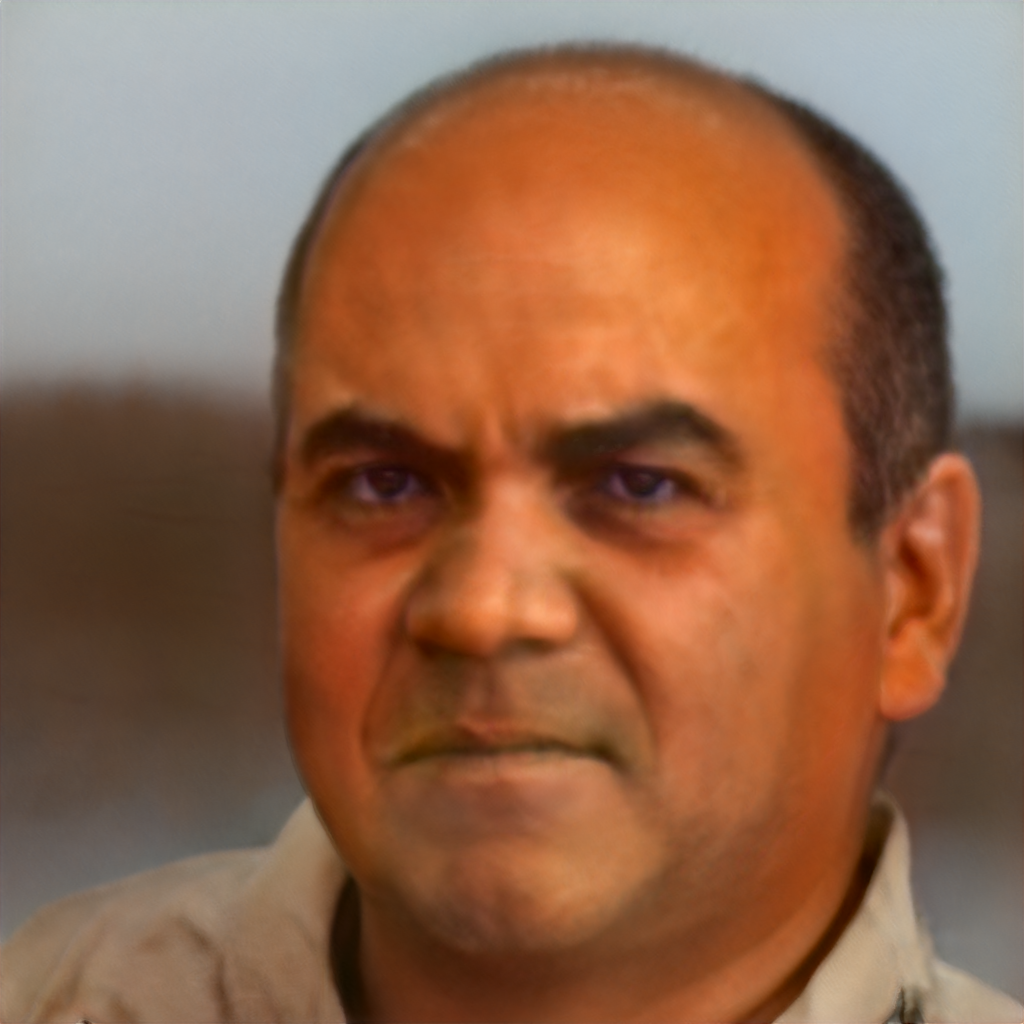

In [30]:
displayImg(g_ema, vectors[37].unsqueeze(dim=0))

In [81]:
for pair in pairs:
    vec1 = a[pair[0]]['latent']
    vec2 = a[pair[1]]['latent']
    vectors = interpolate_hypersphere(vec1, vec2, 50)
    
    fname = pair[0].replace('/', '-')+'_'+pair[1].replace('/', '-')
    
    img_gen, _ = g_ema([torch.unsqueeze(vectors[20], 0)], input_is_latent=True)
    img_ar = make_image(img_gen)
    pil_img = Image.fromarray(img_ar[0])
    pil_img.save('results/interpolated20/'+fname)
    
    img_gen, _ = g_ema([torch.unsqueeze(vectors[20], 0)], input_is_latent=True)
    img_ar = make_image(img_gen)
    pil_img = Image.fromarray(img_ar[0])
    pil_img.save('results/interpolated35/'+fname)

In [9]:
# vect.shape: 1*512
def displayImg(generator, vect):
    img_gen, _ = generator([vect], input_is_latent=True)
    img_ar = make_image(img_gen)
    pil_img = Image.fromarray(img_ar[0])
    
    return pil_img

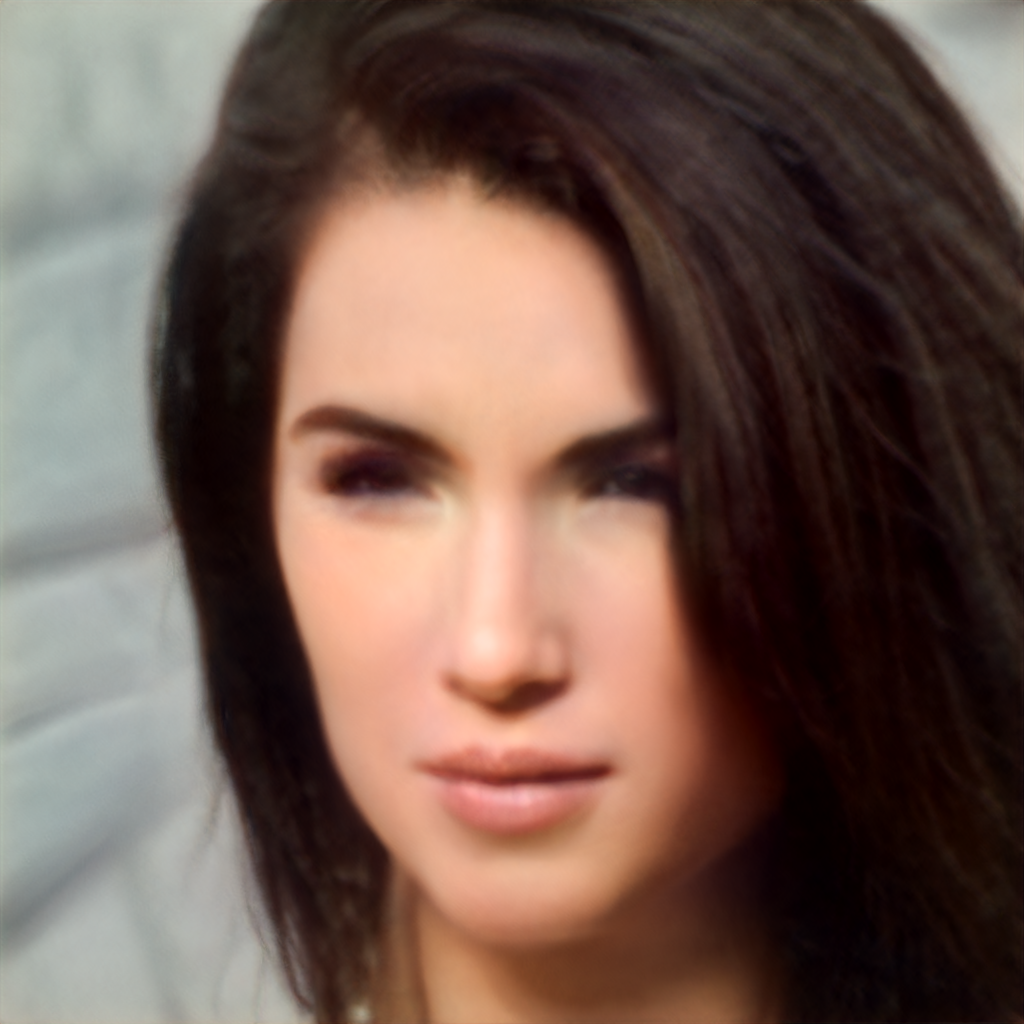

In [63]:
pil_img

In [90]:
img = align_face('/home/vk352/FaceDetection/datasets/sample/obama1.jpg')

Number of faces detected: 1
Detection 0: Left: 282 Top: 82 Right: 411 Bottom: 211
Part 0: (284, 124), Part 1: (284, 142) ...


In [91]:
img.save('/home/vk352/FaceDetection/datasets/sample/obama1_aligned.jpg')

In [98]:
from os import listdir, walk
from os.path import join

In [100]:
path = '/home/vk352/FaceDetection/datasets/celeba/Img_cropped/train'
folders = [folder for folder in listdir(path)]
for folder in folders:
    for (dirpath, dirnames, filenames) in walk(join(path, folder)):
        print(filenames)

['090422.jpg', '145768.jpg', '153070.jpg', '117636.jpg', '033002.jpg', '140864.jpg', '077320.jpg', '038231.jpg', '116310.jpg', '102765.jpg', '015398.jpg', '034175.jpg']
['047912.jpg', '055257.jpg', '010257.jpg', '159347.jpg', '022363.jpg', '046178.jpg', '020547.jpg', '148035.jpg', '129627.jpg', '008819.jpg', '044089.jpg', '071440.jpg']
['138109.jpg', '089461.jpg', '156131.jpg', '114867.jpg', '006039.jpg', '141939.jpg', '006653.jpg', '100223.jpg', '009511.jpg', '161283.jpg', '101380.jpg', '062690.jpg', '114167.jpg', '086293.jpg', '111153.jpg', '143364.jpg', '142826.jpg', '158190.jpg', '033047.jpg', '111541.jpg', '005001.jpg', '069962.jpg', '091084.jpg', '089841.jpg']
['105961.jpg', '020539.jpg', '079605.jpg', '063437.jpg', '140976.jpg', '080011.jpg', '158155.jpg', '071122.jpg', '010708.jpg', '145087.jpg', '101467.jpg', '124470.jpg', '143232.jpg', '104248.jpg', '145420.jpg', '057510.jpg', '153205.jpg', '088709.jpg', '103756.jpg']
['051010.jpg', '096479.jpg', '020624.jpg', '123011.jpg', '

['155602.jpg', '028662.jpg', '080586.jpg', '012223.jpg', '134163.jpg', '048538.jpg', '141840.jpg', '116712.jpg', '130171.jpg', '158656.jpg', '112666.jpg', '145669.jpg', '126693.jpg', '118322.jpg', '097451.jpg', '079775.jpg', '124683.jpg', '005611.jpg', '078944.jpg', '134003.jpg', '034168.jpg', '150282.jpg', '055537.jpg']
['167362.jpg', '176664.jpg', '165322.jpg', '181319.jpg', '181286.jpg', '171485.jpg', '163810.jpg', '180401.jpg', '162857.jpg', '174267.jpg', '164887.jpg', '167825.jpg', '176582.jpg', '174530.jpg', '174012.jpg', '169817.jpg', '164301.jpg', '175955.jpg', '174520.jpg', '177460.jpg', '172305.jpg', '177562.jpg', '166180.jpg', '168312.jpg', '179466.jpg']
['026049.jpg', '076281.jpg', '025168.jpg', '062332.jpg', '071262.jpg', '099033.jpg', '152649.jpg', '002273.jpg', '134139.jpg', '112202.jpg', '091919.jpg', '100346.jpg', '136473.jpg', '133976.jpg', '001203.jpg', '115660.jpg', '003874.jpg', '057620.jpg']
['137314.jpg', '129609.jpg', '031789.jpg', '117447.jpg', '090622.jpg', '0

['107961.jpg', '019119.jpg', '074607.jpg', '063760.jpg', '033849.jpg', '084669.jpg', '027211.jpg', '135245.jpg', '123863.jpg', '011368.jpg', '033858.jpg', '162168.jpg', '038084.jpg', '017569.jpg']
['013488.jpg', '105939.jpg', '061871.jpg', '013498.jpg', '048673.jpg', '142704.jpg', '097171.jpg', '041985.jpg', '009192.jpg']
['089169.jpg', '066502.jpg', '097856.jpg', '014367.jpg', '018246.jpg', '035962.jpg', '102340.jpg', '102729.jpg', '101471.jpg', '000768.jpg', '055281.jpg', '110646.jpg', '069178.jpg', '125891.jpg', '017808.jpg', '069080.jpg', '076627.jpg', '083482.jpg', '045153.jpg']
['139128.jpg', '080445.jpg', '102084.jpg', '141483.jpg', '083519.jpg', '085596.jpg', '128540.jpg', '115922.jpg', '125967.jpg', '016060.jpg']
['178566.jpg', '181584.jpg', '182391.jpg', '180039.jpg', '167038.jpg', '170838.jpg', '165964.jpg', '176227.jpg', '162867.jpg', '178217.jpg', '166994.jpg', '174347.jpg', '173268.jpg', '178628.jpg', '182565.jpg']
['082826.jpg', '143321.jpg', '101581.jpg', '141838.jpg', 

['176600.jpg', '163506.jpg', '175191.jpg', '166258.jpg', '178316.jpg', '166118.jpg', '179869.jpg', '171224.jpg', '172723.jpg', '169999.jpg', '169722.jpg', '175676.jpg', '178127.jpg', '181450.jpg', '182327.jpg', '179836.jpg', '178576.jpg', '167910.jpg', '181371.jpg', '176954.jpg']
['149998.jpg', '114420.jpg', '039464.jpg', '138477.jpg', '083441.jpg']
['151274.jpg', '002435.jpg', '026034.jpg', '033138.jpg', '087331.jpg', '024579.jpg', '052856.jpg', '027987.jpg', '099018.jpg', '015178.jpg', '023158.jpg', '093074.jpg', '028581.jpg', '104203.jpg', '133888.jpg', '103735.jpg', '007506.jpg']
['060770.jpg', '046646.jpg']
['151184.jpg', '058111.jpg', '070487.jpg', '016239.jpg', '146560.jpg', '133387.jpg', '026986.jpg', '108258.jpg', '143528.jpg', '065468.jpg', '041807.jpg', '150725.jpg', '118088.jpg', '003174.jpg', '091379.jpg', '125911.jpg', '092795.jpg', '015232.jpg', '075907.jpg', '115182.jpg', '106562.jpg', '146842.jpg', '086992.jpg', '150750.jpg']
['125710.jpg', '083784.jpg', '031067.jpg', 

['014205.jpg', '142426.jpg', '160005.jpg', '127002.jpg', '031163.jpg', '029380.jpg', '116146.jpg', '128615.jpg', '100371.jpg', '159081.jpg', '055819.jpg', '158754.jpg', '052721.jpg', '026398.jpg', '114017.jpg', '044747.jpg', '148561.jpg', '079264.jpg']
['140404.jpg', '084297.jpg', '127744.jpg', '048130.jpg', '048004.jpg', '076047.jpg', '074356.jpg', '120265.jpg', '036283.jpg', '128162.jpg', '007696.jpg', '143881.jpg', '029013.jpg', '155906.jpg', '103264.jpg', '123137.jpg', '131704.jpg', '140792.jpg', '058637.jpg', '025397.jpg', '008299.jpg', '058234.jpg', '117357.jpg', '079230.jpg', '076724.jpg', '055245.jpg', '006162.jpg']
['055644.jpg', '097655.jpg', '068095.jpg', '148678.jpg', '020273.jpg', '133071.jpg', '123030.jpg', '138734.jpg', '047275.jpg', '098616.jpg', '159881.jpg', '010202.jpg', '042713.jpg', '056539.jpg', '139327.jpg', '107044.jpg', '156994.jpg', '009404.jpg', '007529.jpg', '097281.jpg', '071083.jpg', '086604.jpg', '090092.jpg', '046723.jpg', '139276.jpg', '119864.jpg', '14

['146300.jpg', '050716.jpg', '094245.jpg', '046425.jpg', '136491.jpg', '114945.jpg', '109241.jpg', '072145.jpg', '030524.jpg', '107000.jpg']
['181397.jpg', '173679.jpg']
['135463.jpg', '008972.jpg', '131001.jpg', '158775.jpg', '109123.jpg', '018877.jpg', '082386.jpg', '047532.jpg', '133186.jpg', '080545.jpg', '080539.jpg', '129639.jpg', '109494.jpg', '156940.jpg', '065073.jpg', '136967.jpg', '026053.jpg', '007028.jpg', '151261.jpg', '009286.jpg', '106195.jpg', '098047.jpg']
['171002.jpg', '174770.jpg', '175443.jpg', '171781.jpg', '165464.jpg', '173087.jpg', '178620.jpg', '179444.jpg', '169729.jpg', '165998.jpg', '166112.jpg', '166146.jpg', '165160.jpg', '163187.jpg', '165841.jpg', '177809.jpg', '166175.jpg', '169397.jpg', '174420.jpg', '172238.jpg']
['198605.jpg', '190088.jpg', '186526.jpg', '200568.jpg', '201046.jpg', '198663.jpg', '201255.jpg', '196349.jpg', '186723.jpg', '188475.jpg', '190514.jpg', '198120.jpg', '201724.jpg', '200555.jpg', '201114.jpg', '198625.jpg', '185783.jpg', '

['180997.jpg', '165523.jpg', '173578.jpg', '180755.jpg', '164036.jpg', '170947.jpg']
['152340.jpg', '160200.jpg', '147831.jpg', '059172.jpg', '147199.jpg', '094209.jpg', '154337.jpg', '139663.jpg', '158228.jpg', '114717.jpg', '013678.jpg', '150295.jpg', '063011.jpg', '066679.jpg', '024816.jpg', '117591.jpg', '056274.jpg', '052501.jpg', '041950.jpg', '011558.jpg', '051554.jpg', '031435.jpg', '040499.jpg', '063948.jpg', '101181.jpg', '151866.jpg', '049854.jpg', '129967.jpg']
['076371.jpg', '076436.jpg', '112748.jpg', '030666.jpg', '047232.jpg', '025272.jpg', '143602.jpg', '037963.jpg', '117675.jpg', '103429.jpg', '128477.jpg', '016541.jpg', '142848.jpg', '083144.jpg', '104019.jpg', '096995.jpg', '033862.jpg', '105653.jpg', '160473.jpg', '020138.jpg', '124788.jpg', '054645.jpg', '070854.jpg', '137656.jpg', '025175.jpg', '046958.jpg']
['052820.jpg', '056533.jpg', '027957.jpg', '068721.jpg', '144297.jpg', '090546.jpg', '129255.jpg', '041493.jpg', '152467.jpg', '142232.jpg', '065497.jpg', '0

['111451.jpg', '122547.jpg', '112472.jpg', '153575.jpg', '012468.jpg', '091245.jpg', '099440.jpg', '007504.jpg', '078346.jpg', '106628.jpg', '107249.jpg', '029486.jpg', '078523.jpg', '053375.jpg', '007743.jpg', '026182.jpg', '151334.jpg', '141157.jpg', '046095.jpg', '079765.jpg', '140432.jpg', '096366.jpg', '135502.jpg', '025446.jpg']
['105552.jpg', '131504.jpg', '011357.jpg', '118393.jpg', '121991.jpg', '059977.jpg', '041645.jpg', '014496.jpg', '058845.jpg', '051519.jpg', '000210.jpg', '080319.jpg', '110895.jpg', '139105.jpg', '051746.jpg', '157364.jpg', '121017.jpg', '094586.jpg', '000137.jpg', '019460.jpg', '087670.jpg', '050581.jpg', '084847.jpg']
['064988.jpg', '152629.jpg', '034258.jpg', '157796.jpg', '051244.jpg', '028882.jpg', '115133.jpg', '130885.jpg', '151543.jpg', '065782.jpg', '115898.jpg', '027646.jpg', '148260.jpg', '010393.jpg', '134469.jpg', '106983.jpg', '037857.jpg', '119753.jpg', '069015.jpg', '044486.jpg']
['136249.jpg', '017691.jpg', '137026.jpg', '007935.jpg', '1

['181583.jpg', '181332.jpg', '180772.jpg', '166110.jpg', '179646.jpg', '175753.jpg', '175755.jpg', '164304.jpg', '164287.jpg', '177625.jpg', '164794.jpg', '174291.jpg', '169325.jpg', '176642.jpg', '166567.jpg', '163072.jpg', '175882.jpg', '174708.jpg', '175716.jpg', '169366.jpg', '174847.jpg', '166597.jpg', '175086.jpg', '165979.jpg', '163096.jpg', '177368.jpg']
['181198.jpg', '175815.jpg', '170716.jpg', '171593.jpg', '166937.jpg', '167081.jpg', '176644.jpg', '164861.jpg', '165492.jpg', '173733.jpg', '166099.jpg', '167462.jpg', '164572.jpg', '179917.jpg', '170406.jpg', '176434.jpg', '173325.jpg', '182214.jpg', '177570.jpg', '173347.jpg', '170448.jpg', '164214.jpg', '174626.jpg', '169353.jpg', '168020.jpg', '169456.jpg', '173439.jpg', '181291.jpg']
['047478.jpg', '049922.jpg', '039956.jpg', '029034.jpg', '045104.jpg', '054212.jpg', '145405.jpg', '087090.jpg', '078854.jpg', '018712.jpg', '049940.jpg', '053005.jpg', '114708.jpg', '151026.jpg', '048114.jpg', '113926.jpg', '081452.jpg', '00

['082166.jpg', '147067.jpg', '084122.jpg', '103210.jpg', '107395.jpg', '106293.jpg', '068385.jpg', '012351.jpg', '088015.jpg', '047842.jpg', '104425.jpg', '083427.jpg', '037109.jpg', '083977.jpg', '025821.jpg', '042165.jpg', '022234.jpg', '144833.jpg', '143680.jpg', '089568.jpg', '146627.jpg', '104786.jpg', '050297.jpg', '070046.jpg', '103922.jpg', '003424.jpg', '136782.jpg', '049955.jpg']
['017539.jpg', '139393.jpg', '134851.jpg', '056944.jpg', '139526.jpg', '068963.jpg', '002045.jpg', '015090.jpg', '054591.jpg', '079975.jpg', '135222.jpg', '121745.jpg', '072096.jpg', '033521.jpg', '156596.jpg', '078378.jpg', '090741.jpg', '140739.jpg', '068776.jpg', '153677.jpg', '127824.jpg', '007221.jpg', '085576.jpg', '047766.jpg', '114055.jpg', '058927.jpg', '158203.jpg']
['126358.jpg', '019219.jpg', '129755.jpg', '034042.jpg', '131121.jpg', '018916.jpg', '078356.jpg', '012277.jpg', '127727.jpg', '148797.jpg', '082292.jpg', '120281.jpg', '075474.jpg', '018541.jpg', '074619.jpg', '015530.jpg', '11

['092249.jpg', '112900.jpg', '142951.jpg', '024946.jpg', '003116.jpg', '126965.jpg', '043671.jpg', '019817.jpg', '070749.jpg', '093126.jpg', '160720.jpg', '038181.jpg', '157728.jpg', '146136.jpg', '008074.jpg', '031283.jpg', '016979.jpg', '078791.jpg', '072237.jpg', '118406.jpg', '060482.jpg', '068142.jpg', '032806.jpg', '091140.jpg', '116236.jpg']
['183544.jpg', '192757.jpg', '196049.jpg', '195101.jpg', '199119.jpg', '187858.jpg', '184589.jpg', '189570.jpg', '198655.jpg', '194101.jpg', '191899.jpg', '198044.jpg', '191709.jpg', '185856.jpg', '200854.jpg', '187620.jpg', '190066.jpg', '188614.jpg', '200049.jpg', '187290.jpg', '187615.jpg', '195748.jpg', '186941.jpg', '200128.jpg', '183806.jpg']
['135329.jpg', '145225.jpg', '083701.jpg', '006467.jpg', '108612.jpg', '137190.jpg', '064109.jpg', '148915.jpg', '081854.jpg', '049637.jpg', '026213.jpg', '003793.jpg', '049099.jpg', '005594.jpg', '094749.jpg', '141813.jpg', '043174.jpg', '124726.jpg', '072333.jpg', '128752.jpg', '085311.jpg', '03

['188452.jpg', '193558.jpg']
['025421.jpg', '090339.jpg', '012940.jpg', '018750.jpg', '074756.jpg', '011070.jpg', '058899.jpg', '159316.jpg', '043815.jpg', '026831.jpg', '088494.jpg', '068822.jpg']
['042541.jpg', '042543.jpg']
['158046.jpg', '084193.jpg', '148817.jpg', '161710.jpg', '154937.jpg', '132244.jpg', '079893.jpg', '112638.jpg', '144311.jpg', '020951.jpg']
['100575.jpg', '116577.jpg', '136915.jpg', '142763.jpg', '101332.jpg', '053062.jpg', '152576.jpg', '066560.jpg', '027276.jpg', '021070.jpg', '038560.jpg', '152007.jpg', '014952.jpg', '020614.jpg', '109400.jpg', '076731.jpg', '157387.jpg', '050295.jpg', '101027.jpg', '146221.jpg', '129299.jpg', '146796.jpg', '042538.jpg', '097334.jpg', '132935.jpg', '040073.jpg', '077812.jpg', '065122.jpg']
['089959.jpg', '064445.jpg', '010636.jpg', '032497.jpg', '145242.jpg', '143605.jpg', '051154.jpg', '068003.jpg', '145939.jpg', '052402.jpg', '070732.jpg', '066909.jpg', '000917.jpg', '087297.jpg', '104687.jpg', '084639.jpg', '113984.jpg', 

['101457.jpg', '098737.jpg', '014509.jpg', '092149.jpg', '014282.jpg', '068810.jpg', '096710.jpg', '001526.jpg', '066609.jpg', '015147.jpg', '162331.jpg', '027462.jpg', '080832.jpg', '065023.jpg', '048151.jpg', '092520.jpg', '096161.jpg', '156910.jpg', '058310.jpg', '102310.jpg', '016008.jpg', '038369.jpg', '004585.jpg', '084835.jpg', '096867.jpg', '120237.jpg', '045375.jpg']
['181031.jpg']
['101573.jpg', '047264.jpg', '026462.jpg', '148764.jpg', '096466.jpg', '007334.jpg', '001074.jpg', '009885.jpg', '064913.jpg', '065352.jpg', '001357.jpg', '131295.jpg', '017361.jpg', '059400.jpg', '138075.jpg', '100124.jpg', '028814.jpg']
['152266.jpg', '132163.jpg', '112464.jpg', '135707.jpg', '026991.jpg', '030742.jpg', '145549.jpg', '042834.jpg']
['167245.jpg', '175648.jpg', '169919.jpg', '169494.jpg', '175537.jpg', '176528.jpg', '174987.jpg', '165661.jpg', '166344.jpg', '177682.jpg', '171795.jpg', '181871.jpg', '179611.jpg', '173677.jpg', '167273.jpg', '172386.jpg', '169358.jpg', '169683.jpg', '

['165720.jpg', '176878.jpg', '173819.jpg', '177534.jpg', '173758.jpg', '165338.jpg', '173723.jpg', '181514.jpg', '178398.jpg', '166938.jpg', '167046.jpg', '167456.jpg', '166643.jpg', '163426.jpg', '163352.jpg', '163812.jpg', '164110.jpg', '171447.jpg', '180287.jpg', '164495.jpg', '164930.jpg', '181687.jpg', '164442.jpg', '179409.jpg']
['001648.jpg', '083022.jpg', '110586.jpg', '018240.jpg', '150218.jpg', '091145.jpg', '131877.jpg', '073030.jpg', '024207.jpg', '068024.jpg', '127669.jpg', '060450.jpg', '150068.jpg', '103288.jpg', '020094.jpg', '018620.jpg', '162268.jpg', '070902.jpg', '061452.jpg']
['056265.jpg', '154448.jpg', '058539.jpg', '105082.jpg', '049186.jpg', '097960.jpg', '036304.jpg', '052663.jpg', '050415.jpg', '147363.jpg', '038174.jpg', '091263.jpg', '049629.jpg', '075192.jpg', '044696.jpg', '097242.jpg', '082039.jpg', '026956.jpg', '046672.jpg', '010255.jpg', '124875.jpg', '117054.jpg', '001107.jpg', '044441.jpg']
['171094.jpg', '167276.jpg', '170180.jpg', '173386.jpg', '1

['129849.jpg', '105160.jpg', '091494.jpg', '082456.jpg', '008008.jpg', '014759.jpg', '030678.jpg', '000341.jpg', '072623.jpg', '051670.jpg', '098966.jpg', '085613.jpg', '151517.jpg', '157151.jpg', '040432.jpg', '080432.jpg', '040027.jpg', '126036.jpg']
['002976.jpg', '035992.jpg']
['188834.jpg', '192070.jpg', '193646.jpg', '201635.jpg', '193413.jpg', '191239.jpg', '190728.jpg', '196315.jpg', '184361.jpg', '189795.jpg', '199163.jpg', '195712.jpg', '197575.jpg', '193381.jpg', '186983.jpg', '189512.jpg', '197920.jpg', '194752.jpg', '190554.jpg', '184099.jpg', '199556.jpg', '192164.jpg', '198641.jpg', '186843.jpg', '197353.jpg', '188013.jpg', '184978.jpg', '199323.jpg', '194639.jpg']
['055168.jpg', '024852.jpg', '126554.jpg', '011922.jpg', '006849.jpg']
['091071.jpg', '128830.jpg', '071893.jpg', '108397.jpg', '090643.jpg', '059036.jpg', '089501.jpg', '034080.jpg', '124002.jpg', '065601.jpg', '028554.jpg', '082606.jpg', '121602.jpg', '050540.jpg', '076486.jpg', '162508.jpg', '011704.jpg', '

['081589.jpg', '024274.jpg', '123611.jpg', '053759.jpg', '033760.jpg', '140150.jpg', '045617.jpg', '047746.jpg', '085553.jpg', '013882.jpg', '097441.jpg', '056337.jpg', '102919.jpg', '107634.jpg', '142633.jpg']
['057201.jpg', '140856.jpg', '049756.jpg', '007274.jpg', '122066.jpg', '116747.jpg', '086826.jpg', '104721.jpg', '110392.jpg', '016423.jpg', '106580.jpg', '068765.jpg', '061347.jpg', '009351.jpg', '019162.jpg', '051612.jpg', '092512.jpg', '066713.jpg']
['043869.jpg', '152882.jpg', '025080.jpg', '137076.jpg', '072130.jpg', '154054.jpg', '138785.jpg', '014544.jpg', '134425.jpg', '050309.jpg', '115846.jpg', '010540.jpg', '101749.jpg', '018658.jpg', '055504.jpg', '013517.jpg', '089863.jpg']
['184817.jpg', '200911.jpg', '184819.jpg', '190830.jpg', '182706.jpg', '193117.jpg', '188960.jpg', '197859.jpg']
['056639.jpg', '085709.jpg', '061100.jpg', '038045.jpg', '161448.jpg', '057581.jpg', '161902.jpg', '156317.jpg', '079771.jpg', '081898.jpg', '060281.jpg', '093122.jpg', '002107.jpg', '

['025037.jpg', '059697.jpg', '133050.jpg', '082244.jpg', '128992.jpg', '116377.jpg', '140794.jpg', '086065.jpg', '027444.jpg', '149556.jpg', '031665.jpg', '130465.jpg', '027072.jpg', '050704.jpg', '119423.jpg', '133670.jpg', '130619.jpg', '046234.jpg', '102676.jpg', '027097.jpg', '146131.jpg', '131910.jpg', '090841.jpg']
['033428.jpg', '001921.jpg', '141214.jpg', '023671.jpg', '080276.jpg', '044057.jpg', '002517.jpg', '121576.jpg', '081147.jpg', '091495.jpg', '059603.jpg', '066666.jpg', '157847.jpg', '150291.jpg', '134910.jpg', '079737.jpg', '033951.jpg']
['103309.jpg', '149169.jpg', '106792.jpg', '033352.jpg', '093559.jpg']
['161576.jpg', '076057.jpg', '050662.jpg', '025020.jpg', '052725.jpg', '108010.jpg', '158781.jpg', '004168.jpg', '050739.jpg', '115667.jpg', '016551.jpg', '160769.jpg', '033915.jpg', '085437.jpg', '003423.jpg', '110573.jpg', '058909.jpg', '073782.jpg', '042898.jpg', '009145.jpg', '013533.jpg', '122126.jpg']
['165461.jpg', '180728.jpg', '181401.jpg', '170769.jpg', '

['177292.jpg', '163114.jpg', '172514.jpg', '173320.jpg', '168704.jpg', '172424.jpg', '174095.jpg', '182160.jpg', '167612.jpg', '173665.jpg', '181282.jpg', '180948.jpg', '176791.jpg', '164105.jpg', '180303.jpg', '177848.jpg', '181345.jpg', '165845.jpg']
['047485.jpg', '085408.jpg', '050278.jpg', '025974.jpg', '129497.jpg', '144352.jpg', '076896.jpg', '066317.jpg', '052215.jpg', '041742.jpg', '097052.jpg', '117952.jpg', '047791.jpg', '015479.jpg', '110891.jpg', '111139.jpg', '043247.jpg', '119901.jpg', '161044.jpg', '104298.jpg', '071383.jpg']
['016283.jpg', '052811.jpg', '063997.jpg', '067098.jpg', '080387.jpg', '153129.jpg', '046845.jpg', '104185.jpg', '091529.jpg', '126265.jpg', '101316.jpg']
[]
['163199.jpg', '182050.jpg', '163258.jpg', '173617.jpg', '173839.jpg', '173771.jpg', '172026.jpg', '170248.jpg', '178692.jpg', '178541.jpg']
['009233.jpg', '035243.jpg', '073135.jpg', '047308.jpg', '096991.jpg', '071210.jpg', '026089.jpg', '066326.jpg', '147132.jpg', '137578.jpg', '098335.jpg'

['012969.jpg', '075926.jpg', '096672.jpg', '142313.jpg', '066779.jpg', '051450.jpg', '083154.jpg', '127325.jpg', '053202.jpg', '088498.jpg', '055400.jpg', '105880.jpg', '034381.jpg', '091117.jpg', '036451.jpg', '117605.jpg', '071901.jpg', '115284.jpg', '149780.jpg', '001650.jpg', '056792.jpg', '080801.jpg', '078253.jpg']
['176753.jpg', '166604.jpg', '163984.jpg', '166793.jpg', '171788.jpg', '163107.jpg', '174902.jpg', '174380.jpg']
['040279.jpg', '149429.jpg', '019028.jpg', '003585.jpg', '117013.jpg', '030735.jpg', '029014.jpg', '117725.jpg', '152657.jpg', '160595.jpg', '062712.jpg', '160989.jpg', '061690.jpg', '106895.jpg', '054889.jpg', '077544.jpg', '156256.jpg', '008818.jpg', '056893.jpg']
['069108.jpg', '093931.jpg', '151579.jpg', '037880.jpg', '091791.jpg', '134497.jpg', '074538.jpg', '121790.jpg', '067836.jpg']
['174800.jpg', '173844.jpg', '177166.jpg', '176070.jpg', '167543.jpg', '164550.jpg', '177602.jpg', '174558.jpg', '173530.jpg', '179165.jpg', '164395.jpg', '177030.jpg', '

['165032.jpg', '181229.jpg', '166437.jpg', '162948.jpg', '170494.jpg', '175199.jpg', '164611.jpg', '166208.jpg', '163257.jpg', '181983.jpg', '179864.jpg', '163233.jpg', '175198.jpg', '166467.jpg', '168098.jpg', '180746.jpg', '163760.jpg', '175178.jpg', '178026.jpg', '176419.jpg', '164995.jpg', '179649.jpg']
['128156.jpg', '090242.jpg', '060391.jpg', '024803.jpg', '157656.jpg', '022466.jpg', '074977.jpg', '127624.jpg', '044066.jpg', '130347.jpg', '039103.jpg', '140937.jpg', '003043.jpg', '011556.jpg']
['192625.jpg', '184938.jpg', '183704.jpg', '184306.jpg', '200936.jpg', '197810.jpg', '197050.jpg', '198019.jpg', '196504.jpg', '183062.jpg', '195726.jpg', '190392.jpg', '188829.jpg', '186193.jpg', '183726.jpg', '183651.jpg']
['180306.jpg', '167023.jpg', '180661.jpg', '174203.jpg', '170514.jpg', '171046.jpg', '167294.jpg', '181064.jpg', '166771.jpg', '177991.jpg', '172548.jpg', '172908.jpg', '175629.jpg', '178801.jpg', '176887.jpg', '178989.jpg', '169585.jpg']
['012342.jpg', '152455.jpg', '

['166796.jpg', '174431.jpg', '176539.jpg', '182147.jpg', '176425.jpg', '170517.jpg', '163170.jpg', '167996.jpg', '166632.jpg', '181626.jpg', '179556.jpg', '172937.jpg', '175461.jpg', '166713.jpg', '177356.jpg', '179166.jpg', '163362.jpg', '167769.jpg', '175773.jpg', '169605.jpg', '167216.jpg', '178131.jpg', '177360.jpg', '169447.jpg', '178466.jpg', '177762.jpg', '179024.jpg']
['073275.jpg', '037055.jpg', '111871.jpg', '044431.jpg', '148313.jpg', '053323.jpg', '094223.jpg', '087048.jpg', '025237.jpg', '000860.jpg', '113519.jpg', '122280.jpg', '065736.jpg', '094659.jpg', '105435.jpg', '012765.jpg', '085483.jpg', '092447.jpg', '099723.jpg', '033171.jpg', '111304.jpg', '008617.jpg', '019431.jpg', '083025.jpg']
['108399.jpg', '076011.jpg', '013670.jpg', '041601.jpg', '060504.jpg', '131048.jpg', '010379.jpg', '022813.jpg', '141211.jpg', '068843.jpg', '006489.jpg', '044512.jpg', '028188.jpg', '135171.jpg', '027898.jpg', '068478.jpg', '022142.jpg', '137431.jpg', '054639.jpg', '067297.jpg', '03

['137024.jpg', '159401.jpg', '019153.jpg', '120820.jpg', '124613.jpg', '148895.jpg', '081897.jpg', '093433.jpg', '156319.jpg', '145989.jpg', '081706.jpg', '101459.jpg', '042801.jpg', '004338.jpg', '155716.jpg', '018913.jpg', '066020.jpg', '055075.jpg', '028218.jpg', '148650.jpg', '106936.jpg']
['193789.jpg', '191504.jpg', '198237.jpg', '185463.jpg', '190734.jpg', '202144.jpg', '193874.jpg', '195603.jpg', '200873.jpg', '191350.jpg', '202313.jpg', '193768.jpg', '198443.jpg']
['147406.jpg', '037128.jpg', '092683.jpg', '089856.jpg', '012701.jpg', '008348.jpg', '035651.jpg', '068649.jpg', '060018.jpg', '137894.jpg', '020071.jpg', '057941.jpg', '009237.jpg', '102161.jpg', '095438.jpg', '077166.jpg', '034163.jpg', '021860.jpg', '012247.jpg', '003648.jpg', '077005.jpg', '153642.jpg', '029514.jpg']
['070414.jpg', '100200.jpg', '085324.jpg', '076411.jpg', '054713.jpg', '070581.jpg', '083965.jpg', '060304.jpg', '007790.jpg', '146850.jpg', '118625.jpg', '127294.jpg', '083950.jpg', '096507.jpg', '1

['080468.jpg', '096251.jpg', '162350.jpg', '147477.jpg', '046261.jpg', '058793.jpg', '019736.jpg', '144050.jpg', '082355.jpg']
['195323.jpg', '189790.jpg', '201495.jpg', '200515.jpg', '190382.jpg', '186819.jpg', '188283.jpg', '191217.jpg', '194170.jpg', '189401.jpg', '199391.jpg', '198324.jpg', '201887.jpg', '200487.jpg', '195550.jpg', '201995.jpg', '186671.jpg', '186691.jpg', '188315.jpg', '194861.jpg', '191392.jpg', '189528.jpg', '188578.jpg', '185114.jpg', '186470.jpg', '202046.jpg']
['069105.jpg', '160259.jpg', '052787.jpg', '006266.jpg', '153533.jpg', '152770.jpg', '137323.jpg', '114122.jpg', '073668.jpg', '054620.jpg', '129363.jpg', '020521.jpg', '099721.jpg', '006550.jpg', '086827.jpg', '054991.jpg', '070798.jpg', '030111.jpg']
['171187.jpg', '180443.jpg', '174836.jpg', '174864.jpg', '174001.jpg', '167651.jpg', '165758.jpg', '172612.jpg']
['184082.jpg', '193051.jpg', '190258.jpg', '194086.jpg', '193632.jpg', '194231.jpg', '188092.jpg', '200115.jpg', '197348.jpg', '184404.jpg', '

['166999.jpg', '166492.jpg', '168341.jpg', '180153.jpg', '180095.jpg', '169841.jpg', '171711.jpg', '181154.jpg', '170086.jpg', '170501.jpg', '180707.jpg', '170320.jpg', '181368.jpg', '164978.jpg', '166852.jpg', '163570.jpg', '162922.jpg', '180509.jpg', '164634.jpg', '170499.jpg', '163421.jpg', '173575.jpg', '180270.jpg', '175123.jpg', '176775.jpg', '170860.jpg', '176145.jpg']
['018830.jpg', '085050.jpg', '123593.jpg', '116351.jpg']
['148831.jpg', '122888.jpg', '130109.jpg', '062693.jpg', '085432.jpg', '154475.jpg', '081148.jpg', '138191.jpg', '060858.jpg', '029600.jpg', '023983.jpg', '124422.jpg', '019106.jpg', '042391.jpg', '006801.jpg', '161638.jpg', '123496.jpg', '137676.jpg', '160430.jpg', '007766.jpg', '119421.jpg', '028139.jpg']
['007109.jpg', '106108.jpg', '103838.jpg', '123861.jpg', '067747.jpg', '125795.jpg', '129664.jpg']
['070474.jpg', '103837.jpg', '148765.jpg', '130411.jpg', '090506.jpg', '159532.jpg', '116724.jpg', '014157.jpg', '104688.jpg', '076501.jpg', '019568.jpg', '

['071771.jpg', '003912.jpg', '031085.jpg', '149493.jpg', '141172.jpg', '148133.jpg', '114322.jpg']
['174963.jpg', '167921.jpg', '174677.jpg', '179604.jpg', '169862.jpg', '169331.jpg', '182174.jpg', '162811.jpg', '176303.jpg', '176875.jpg', '167044.jpg', '180937.jpg', '178522.jpg', '176958.jpg', '168860.jpg', '165039.jpg', '169132.jpg', '179524.jpg', '171093.jpg', '179558.jpg', '163583.jpg', '164054.jpg', '172102.jpg', '164984.jpg', '174224.jpg', '169207.jpg', '175429.jpg', '172863.jpg', '170979.jpg']
['095113.jpg', '095404.jpg', '016941.jpg', '008938.jpg', '081081.jpg', '032528.jpg', '003313.jpg', '010501.jpg', '116927.jpg', '043417.jpg', '073505.jpg', '052618.jpg', '055083.jpg', '027755.jpg', '047805.jpg', '108547.jpg', '039360.jpg', '146303.jpg', '012169.jpg', '055456.jpg', '143118.jpg', '026888.jpg', '050005.jpg', '119081.jpg', '082328.jpg']
['049867.jpg', '000141.jpg', '156223.jpg', '043153.jpg', '084814.jpg', '115177.jpg', '104921.jpg', '111064.jpg', '064424.jpg', '093912.jpg', '0

['165259.jpg', '171285.jpg', '173687.jpg', '167862.jpg', '172255.jpg', '171299.jpg', '182385.jpg', '180489.jpg', '181645.jpg', '180104.jpg', '168657.jpg', '167987.jpg', '176890.jpg', '166057.jpg', '167154.jpg', '181980.jpg', '168422.jpg']
['120540.jpg', '025482.jpg', '069742.jpg', '160471.jpg', '052568.jpg', '135374.jpg', '001989.jpg', '109720.jpg', '102449.jpg', '038026.jpg', '016799.jpg', '103656.jpg', '080002.jpg', '062138.jpg', '101954.jpg', '061562.jpg', '160143.jpg', '116614.jpg', '111999.jpg', '025090.jpg', '071324.jpg', '121533.jpg', '022742.jpg', '073155.jpg']
['090750.jpg', '145264.jpg', '023762.jpg', '116002.jpg', '023618.jpg', '041371.jpg', '082400.jpg', '095516.jpg', '045599.jpg', '025358.jpg', '115513.jpg', '008821.jpg', '007052.jpg', '081511.jpg', '013158.jpg', '155416.jpg', '042097.jpg', '135338.jpg']
['054729.jpg', '110384.jpg', '101002.jpg']
['057791.jpg', '150517.jpg', '088132.jpg', '157289.jpg', '020382.jpg', '079210.jpg', '056568.jpg', '092527.jpg', '109894.jpg', '

['175504.jpg', '163590.jpg', '164639.jpg', '172975.jpg', '163933.jpg', '171129.jpg', '165094.jpg', '172382.jpg', '169078.jpg', '170127.jpg', '163015.jpg', '169270.jpg', '167483.jpg', '175858.jpg', '164581.jpg', '175606.jpg', '176369.jpg', '166062.jpg', '170354.jpg', '171365.jpg', '179134.jpg', '164723.jpg']
['151118.jpg', '148506.jpg', '101836.jpg', '105690.jpg', '117175.jpg', '158454.jpg', '054604.jpg', '123058.jpg', '133122.jpg', '006564.jpg', '005077.jpg', '132008.jpg', '104028.jpg', '074177.jpg', '128736.jpg', '086271.jpg', '040952.jpg', '068979.jpg']
['102283.jpg', '054469.jpg', '016710.jpg', '007889.jpg', '099142.jpg', '093072.jpg', '161216.jpg', '058137.jpg', '137713.jpg', '045302.jpg', '073610.jpg', '050520.jpg', '077753.jpg', '112601.jpg', '095171.jpg', '116036.jpg', '015304.jpg', '126262.jpg', '128181.jpg', '029465.jpg', '143674.jpg', '025605.jpg', '148084.jpg', '017734.jpg', '014397.jpg', '130298.jpg', '120336.jpg', '094368.jpg']
['187019.jpg', '190720.jpg', '192073.jpg', '1

['165422.jpg', '164168.jpg', '177072.jpg', '164400.jpg', '175160.jpg', '179198.jpg', '165297.jpg', '167230.jpg', '181052.jpg', '180698.jpg', '181922.jpg', '179626.jpg', '176826.jpg', '173638.jpg', '173083.jpg', '167234.jpg', '182027.jpg', '173748.jpg', '177950.jpg']
['158445.jpg', '060861.jpg', '075891.jpg', '131605.jpg', '059681.jpg', '066279.jpg', '058981.jpg', '008423.jpg', '096199.jpg', '145158.jpg', '080470.jpg', '021978.jpg']
['178910.jpg', '182588.jpg', '178390.jpg', '163208.jpg', '164804.jpg', '173699.jpg', '176216.jpg', '171998.jpg', '166289.jpg', '180255.jpg', '181269.jpg', '167191.jpg', '171099.jpg', '182478.jpg', '181015.jpg', '170889.jpg', '166111.jpg', '169307.jpg', '169899.jpg', '164708.jpg', '169677.jpg', '175697.jpg', '171492.jpg', '167844.jpg', '178537.jpg']
['018425.jpg', '055693.jpg', '135659.jpg', '039275.jpg', '158092.jpg', '124007.jpg', '012476.jpg', '104218.jpg', '031604.jpg', '001083.jpg', '127583.jpg', '004380.jpg', '135013.jpg']
['163160.jpg', '168766.jpg', '

['071181.jpg', '091098.jpg', '075407.jpg', '124877.jpg', '023510.jpg', '084983.jpg', '125802.jpg', '078008.jpg', '142499.jpg', '107431.jpg', '119121.jpg', '073025.jpg', '098132.jpg', '049708.jpg', '156062.jpg', '123518.jpg', '037426.jpg', '161125.jpg', '006952.jpg', '033993.jpg', '011239.jpg']
['079637.jpg', '157783.jpg', '077209.jpg', '060463.jpg', '126027.jpg', '103811.jpg', '033052.jpg', '146233.jpg', '019286.jpg', '090948.jpg', '089238.jpg', '070617.jpg', '117247.jpg', '056100.jpg', '078236.jpg', '046346.jpg', '022458.jpg', '126856.jpg', '002927.jpg', '114811.jpg', '093809.jpg']
['111295.jpg', '050582.jpg', '052865.jpg', '006975.jpg', '017753.jpg', '128282.jpg', '048661.jpg', '112419.jpg', '146585.jpg', '005297.jpg', '108116.jpg', '004221.jpg', '104281.jpg', '002325.jpg', '123048.jpg', '036471.jpg', '056238.jpg']
['134867.jpg', '045262.jpg', '133230.jpg', '127951.jpg', '131345.jpg', '076098.jpg', '141624.jpg', '028022.jpg', '008982.jpg', '008016.jpg', '100372.jpg', '133874.jpg', '0

['027802.jpg', '101003.jpg', '090491.jpg', '022318.jpg', '059784.jpg', '075278.jpg', '145604.jpg', '120058.jpg', '102022.jpg', '158262.jpg', '161090.jpg', '078463.jpg', '096952.jpg', '059943.jpg', '026996.jpg', '057379.jpg', '032093.jpg', '005276.jpg', '076438.jpg', '055600.jpg', '141594.jpg', '028539.jpg', '101028.jpg', '019146.jpg', '142695.jpg', '074918.jpg']
['001187.jpg', '034171.jpg', '093270.jpg', '013493.jpg', '039055.jpg']
['146064.jpg', '036770.jpg', '126739.jpg', '078163.jpg', '144509.jpg', '055275.jpg', '126292.jpg', '149393.jpg', '118048.jpg']
['156878.jpg', '082079.jpg', '020815.jpg', '034874.jpg', '052030.jpg', '004657.jpg', '080183.jpg', '002846.jpg', '012722.jpg', '045117.jpg', '147326.jpg', '121231.jpg', '005189.jpg', '081773.jpg', '034807.jpg', '119879.jpg', '061552.jpg', '095597.jpg', '049418.jpg', '044860.jpg', '000868.jpg', '057195.jpg', '018008.jpg', '115996.jpg', '076506.jpg']
['083745.jpg', '082391.jpg', '122397.jpg', '056666.jpg']
['019290.jpg', '154544.jpg', 

['083516.jpg', '161523.jpg', '044780.jpg', '137877.jpg', '100541.jpg', '022974.jpg', '052647.jpg', '156853.jpg', '139333.jpg', '021652.jpg', '072569.jpg', '023570.jpg', '034096.jpg', '044434.jpg', '065919.jpg', '124555.jpg', '073551.jpg', '156841.jpg', '050275.jpg', '145664.jpg', '037238.jpg', '127021.jpg', '000678.jpg', '038445.jpg', '000988.jpg', '030076.jpg', '074299.jpg']
['058397.jpg', '093750.jpg', '143899.jpg', '048345.jpg', '046795.jpg', '130053.jpg', '018967.jpg', '041925.jpg', '076870.jpg', '008476.jpg', '047369.jpg', '144573.jpg', '040560.jpg', '059087.jpg', '125212.jpg', '061887.jpg', '011740.jpg']
['039671.jpg', '089815.jpg', '090576.jpg', '084645.jpg', '080746.jpg', '160560.jpg', '137794.jpg', '001613.jpg', '032266.jpg', '057859.jpg', '083885.jpg', '055828.jpg', '076894.jpg', '028172.jpg', '026660.jpg', '069600.jpg', '142979.jpg', '000482.jpg', '146047.jpg', '091178.jpg', '017986.jpg', '051019.jpg']
['100600.jpg', '126278.jpg', '064517.jpg', '127670.jpg', '036097.jpg', '0

['170010.jpg', '180679.jpg', '169233.jpg', '177532.jpg']
['176009.jpg', '164048.jpg', '171664.jpg', '167961.jpg', '180502.jpg', '177627.jpg', '165951.jpg', '165080.jpg', '168515.jpg', '180742.jpg', '166249.jpg', '164492.jpg', '173668.jpg', '166277.jpg', '169350.jpg', '178231.jpg', '182131.jpg', '167200.jpg', '177794.jpg', '176136.jpg']
['179012.jpg', '166235.jpg', '169649.jpg', '176674.jpg', '181323.jpg', '174793.jpg', '181437.jpg', '167257.jpg', '164538.jpg', '175897.jpg', '179539.jpg', '181084.jpg', '174109.jpg', '166441.jpg', '167537.jpg', '167287.jpg', '163937.jpg', '168989.jpg', '170871.jpg']
['129597.jpg', '104691.jpg', '100912.jpg', '094320.jpg', '130835.jpg']
['176947.jpg', '179882.jpg', '172018.jpg', '177568.jpg', '165439.jpg', '168907.jpg', '165081.jpg', '165415.jpg', '169151.jpg', '171908.jpg', '174246.jpg', '170239.jpg']
['118058.jpg', '099367.jpg', '036803.jpg', '009415.jpg', '035128.jpg', '156993.jpg', '008414.jpg', '001532.jpg', '087215.jpg', '131757.jpg', '037820.jpg', 

['126332.jpg']
['088604.jpg', '049407.jpg', '141518.jpg', '118461.jpg', '137440.jpg', '077992.jpg', '083903.jpg', '127314.jpg', '073463.jpg', '031869.jpg', '066315.jpg', '071036.jpg', '009645.jpg', '082439.jpg']
['173424.jpg', '168406.jpg', '175759.jpg', '164428.jpg', '181221.jpg', '174040.jpg', '165496.jpg', '168884.jpg', '173444.jpg', '175779.jpg', '170168.jpg', '177142.jpg', '177660.jpg', '167875.jpg', '177936.jpg', '178790.jpg', '166243.jpg']
['155120.jpg', '143033.jpg', '069999.jpg', '135454.jpg', '046807.jpg', '122234.jpg', '134413.jpg', '121053.jpg', '081538.jpg', '097902.jpg', '135973.jpg', '125267.jpg']
['033151.jpg', '022883.jpg', '158960.jpg', '159211.jpg', '044491.jpg', '154957.jpg', '134552.jpg', '144219.jpg', '043313.jpg', '018947.jpg', '035948.jpg', '128802.jpg', '000716.jpg', '000173.jpg', '113616.jpg', '034150.jpg', '106971.jpg', '012660.jpg', '016402.jpg']
['050261.jpg', '030313.jpg', '096898.jpg', '023905.jpg', '134707.jpg', '085949.jpg', '117921.jpg', '015791.jpg', 

['144260.jpg', '024642.jpg', '038768.jpg', '002806.jpg', '128317.jpg', '078720.jpg', '160965.jpg', '147553.jpg', '041351.jpg', '028566.jpg', '031150.jpg', '078025.jpg', '144620.jpg', '157928.jpg', '014258.jpg', '104002.jpg', '025654.jpg', '096425.jpg', '030907.jpg', '082702.jpg', '027130.jpg', '153257.jpg', '006416.jpg', '090685.jpg', '059085.jpg', '136316.jpg', '071480.jpg', '024194.jpg', '060988.jpg']
['008336.jpg']
['157979.jpg', '018792.jpg', '152480.jpg', '039602.jpg', '130016.jpg', '157146.jpg', '039389.jpg', '152203.jpg', '063655.jpg', '075180.jpg', '041905.jpg', '104655.jpg', '087200.jpg', '038322.jpg', '015594.jpg', '055602.jpg', '134533.jpg', '093204.jpg', '033474.jpg', '078640.jpg', '152508.jpg', '146645.jpg']
['056399.jpg', '086319.jpg', '023072.jpg']
['025769.jpg', '091698.jpg', '155260.jpg']
['117173.jpg', '031998.jpg', '062896.jpg', '010478.jpg', '045915.jpg', '015855.jpg', '054715.jpg', '101568.jpg', '086655.jpg', '075857.jpg', '089270.jpg', '141681.jpg', '071895.jpg', 

['139126.jpg', '086773.jpg', '020730.jpg', '143109.jpg', '097362.jpg', '009811.jpg', '096788.jpg', '071453.jpg', '149346.jpg', '053541.jpg', '122535.jpg', '031482.jpg', '020070.jpg', '117314.jpg', '154280.jpg', '133903.jpg', '056296.jpg', '098284.jpg', '122121.jpg', '100033.jpg', '095628.jpg', '052389.jpg', '001171.jpg']
['183717.jpg', '199028.jpg', '199479.jpg', '197360.jpg', '184581.jpg', '183250.jpg', '193145.jpg', '185478.jpg', '183289.jpg', '201963.jpg', '193574.jpg', '185426.jpg', '195412.jpg', '189624.jpg', '190012.jpg', '193363.jpg', '185670.jpg', '183446.jpg']
['108572.jpg', '124119.jpg', '099817.jpg', '123875.jpg', '031126.jpg', '138423.jpg', '063143.jpg', '104257.jpg', '014612.jpg', '085880.jpg', '015626.jpg', '030776.jpg', '146851.jpg']
['023643.jpg', '045402.jpg', '106841.jpg', '021150.jpg', '042944.jpg', '121018.jpg', '104241.jpg', '095093.jpg', '063410.jpg', '024238.jpg', '089952.jpg']
['170052.jpg', '163027.jpg', '182451.jpg', '181100.jpg', '182133.jpg', '174531.jpg', '

['073587.jpg', '055241.jpg', '045830.jpg', '013175.jpg', '117405.jpg', '087072.jpg', '128823.jpg', '056567.jpg', '096807.jpg', '094584.jpg', '143227.jpg', '061020.jpg', '017593.jpg', '027408.jpg', '118690.jpg', '064362.jpg', '110352.jpg', '043021.jpg']
['017007.jpg', '023197.jpg', '075655.jpg', '130680.jpg', '153381.jpg', '049450.jpg']
['041060.jpg', '069526.jpg', '100473.jpg', '038641.jpg', '141349.jpg', '104791.jpg', '161877.jpg', '106447.jpg', '089585.jpg', '101252.jpg', '160016.jpg', '087332.jpg', '082941.jpg', '154941.jpg', '044767.jpg', '023134.jpg', '027071.jpg', '144584.jpg', '044055.jpg', '047949.jpg', '055209.jpg', '123188.jpg', '137447.jpg', '108121.jpg', '090697.jpg', '149403.jpg', '034050.jpg', '005649.jpg', '083173.jpg']
['106408.jpg', '074864.jpg', '010125.jpg', '085790.jpg', '103667.jpg', '066216.jpg', '076392.jpg', '083830.jpg', '157276.jpg', '070563.jpg', '123098.jpg', '024787.jpg', '059160.jpg', '157368.jpg', '051917.jpg', '137780.jpg', '078682.jpg', '006968.jpg', '0

['099455.jpg', '032641.jpg', '157352.jpg', '031160.jpg', '067817.jpg', '135953.jpg', '084085.jpg', '106848.jpg', '124319.jpg', '094408.jpg', '085525.jpg', '126245.jpg']
['184441.jpg', '188026.jpg', '193167.jpg', '196599.jpg', '198862.jpg', '201400.jpg', '190205.jpg', '199731.jpg', '196589.jpg', '184607.jpg', '200796.jpg', '190988.jpg', '183351.jpg', '195601.jpg', '189393.jpg', '188148.jpg', '182914.jpg', '194477.jpg', '194734.jpg', '190961.jpg', '198758.jpg', '199947.jpg', '190156.jpg', '185168.jpg']
['176270.jpg', '166416.jpg', '167204.jpg']
['085296.jpg', '019870.jpg', '044502.jpg']
['071675.jpg', '029989.jpg', '160006.jpg', '084411.jpg', '068942.jpg', '105585.jpg', '053502.jpg', '130754.jpg', '027470.jpg', '139693.jpg', '011757.jpg', '024299.jpg', '160854.jpg', '098147.jpg', '024612.jpg', '138851.jpg', '057015.jpg', '009939.jpg', '026807.jpg', '152156.jpg', '051842.jpg', '020184.jpg', '112403.jpg', '125311.jpg', '102363.jpg']
['044406.jpg', '023514.jpg', '076515.jpg', '083271.jpg', 

['105965.jpg', '118644.jpg', '075385.jpg', '146716.jpg', '064029.jpg', '128984.jpg', '041411.jpg', '160756.jpg', '036676.jpg', '064824.jpg', '151774.jpg', '082238.jpg', '123498.jpg', '150251.jpg', '056410.jpg', '084536.jpg', '004127.jpg']
['150591.jpg', '043475.jpg', '117873.jpg', '094665.jpg', '140038.jpg', '022964.jpg', '132758.jpg', '084646.jpg']
['157680.jpg', '093755.jpg', '056404.jpg', '029287.jpg', '005491.jpg', '059772.jpg', '025777.jpg', '060960.jpg', '071267.jpg', '019467.jpg', '105800.jpg', '100312.jpg', '057080.jpg', '041951.jpg', '068770.jpg', '121163.jpg', '005381.jpg', '061182.jpg', '155572.jpg', '093158.jpg', '153287.jpg', '001375.jpg', '142600.jpg']
['003059.jpg', '047096.jpg', '064128.jpg', '042770.jpg', '019457.jpg', '101705.jpg', '136724.jpg', '087255.jpg', '026422.jpg', '129090.jpg', '070876.jpg', '011741.jpg', '158204.jpg', '100100.jpg', '142393.jpg', '160654.jpg', '045629.jpg']
['068661.jpg', '064958.jpg', '131416.jpg', '020588.jpg', '101820.jpg', '161805.jpg', '

['016521.jpg', '107755.jpg', '090193.jpg', '024619.jpg', '076332.jpg', '009126.jpg', '064121.jpg', '139193.jpg', '042619.jpg', '095401.jpg', '156221.jpg', '080379.jpg', '125305.jpg', '143534.jpg', '135795.jpg', '006914.jpg', '096108.jpg', '032031.jpg', '117471.jpg', '039686.jpg', '080705.jpg']
['049908.jpg', '022961.jpg', '147469.jpg', '053476.jpg', '098866.jpg', '099311.jpg', '161786.jpg', '125314.jpg', '075354.jpg', '029925.jpg', '070392.jpg', '058164.jpg', '013180.jpg', '016734.jpg', '068694.jpg', '010678.jpg', '067095.jpg', '112948.jpg', '067660.jpg', '013351.jpg', '160180.jpg', '113961.jpg', '075174.jpg']
['009406.jpg', '074191.jpg', '101916.jpg', '108830.jpg', '081661.jpg', '145612.jpg', '071526.jpg', '085937.jpg', '059106.jpg', '121731.jpg', '112255.jpg', '131423.jpg', '125151.jpg', '146618.jpg', '142934.jpg', '062825.jpg', '114890.jpg', '030388.jpg', '145825.jpg', '108677.jpg', '014348.jpg', '011171.jpg', '156451.jpg', '152806.jpg', '047408.jpg', '121732.jpg', '091792.jpg', '10

['060267.jpg', '002894.jpg', '033512.jpg', '017950.jpg', '117810.jpg', '096112.jpg', '150675.jpg', '129501.jpg', '087545.jpg', '103038.jpg', '020991.jpg', '034936.jpg', '100718.jpg', '131219.jpg', '119046.jpg', '056953.jpg']
['012093.jpg', '126632.jpg', '074190.jpg', '065068.jpg', '136525.jpg', '028451.jpg', '135202.jpg', '078261.jpg', '075613.jpg']
['048282.jpg', '106247.jpg', '124437.jpg', '012762.jpg', '132607.jpg', '064503.jpg', '011079.jpg', '005398.jpg', '159800.jpg', '030616.jpg', '103878.jpg']
['104186.jpg', '104325.jpg', '052330.jpg']
['158041.jpg']
['065981.jpg', '130557.jpg', '025909.jpg', '077110.jpg', '034247.jpg', '100790.jpg', '070738.jpg', '098883.jpg', '103582.jpg', '152229.jpg', '019807.jpg', '130932.jpg', '010488.jpg', '138826.jpg', '113365.jpg', '058606.jpg', '038727.jpg', '109818.jpg']
['135486.jpg', '017050.jpg', '018609.jpg', '052227.jpg', '028528.jpg', '093546.jpg', '098845.jpg', '115868.jpg', '067762.jpg', '136314.jpg', '009867.jpg', '082833.jpg', '010086.jpg',

['024171.jpg', '006540.jpg', '133210.jpg', '138735.jpg', '092254.jpg', '043374.jpg', '142204.jpg', '157492.jpg', '032664.jpg', '004095.jpg', '152216.jpg', '008211.jpg', '073917.jpg', '062180.jpg', '023891.jpg', '009688.jpg', '127469.jpg', '065094.jpg', '023246.jpg', '074853.jpg', '078898.jpg', '005348.jpg', '109754.jpg', '053866.jpg', '015283.jpg', '072257.jpg', '013805.jpg', '076480.jpg']
['074391.jpg', '103487.jpg', '064683.jpg', '008861.jpg', '129936.jpg', '136318.jpg', '043894.jpg', '072234.jpg', '150649.jpg', '141244.jpg', '049199.jpg', '057412.jpg', '139530.jpg', '023363.jpg', '143764.jpg', '119029.jpg', '133216.jpg', '088896.jpg']
['186209.jpg', '188212.jpg', '199533.jpg', '184947.jpg', '199705.jpg', '194748.jpg', '183789.jpg', '198525.jpg', '194885.jpg', '197171.jpg', '192959.jpg', '187791.jpg', '201323.jpg', '190921.jpg', '194113.jpg']
['089529.jpg', '044886.jpg', '152309.jpg', '157507.jpg', '130995.jpg', '154146.jpg', '071756.jpg', '030316.jpg', '107551.jpg', '152661.jpg', '0

['089850.jpg', '060530.jpg', '108623.jpg', '073768.jpg', '039454.jpg', '138911.jpg', '010910.jpg', '059948.jpg', '027289.jpg', '081785.jpg', '122197.jpg', '152322.jpg', '124704.jpg', '119086.jpg', '117002.jpg', '100956.jpg', '013192.jpg', '092055.jpg', '089008.jpg', '136502.jpg', '143105.jpg', '055492.jpg', '117000.jpg', '005039.jpg', '084648.jpg', '110357.jpg', '098318.jpg']
['194165.jpg', '195137.jpg']
['060000.jpg', '147485.jpg', '043045.jpg', '075536.jpg', '123172.jpg', '070987.jpg', '111518.jpg', '019448.jpg', '101168.jpg', '100446.jpg', '157541.jpg', '041026.jpg', '002035.jpg', '017334.jpg', '079720.jpg', '134953.jpg', '086862.jpg', '054371.jpg', '127978.jpg']
['163824.jpg', '171762.jpg', '167620.jpg', '162771.jpg', '163876.jpg', '165726.jpg', '169956.jpg', '165619.jpg', '175324.jpg']
['034039.jpg', '060382.jpg', '018450.jpg', '071629.jpg']
['118509.jpg', '055321.jpg', '008443.jpg', '059494.jpg', '142300.jpg', '000465.jpg', '086726.jpg', '026308.jpg', '069625.jpg', '042679.jpg', 

['161467.jpg', '056185.jpg', '048222.jpg', '162464.jpg', '061991.jpg', '016940.jpg', '132714.jpg', '049741.jpg', '117751.jpg', '116863.jpg', '012700.jpg', '130817.jpg', '032431.jpg', '096038.jpg', '093451.jpg', '009608.jpg', '161977.jpg', '154442.jpg']
['095150.jpg', '054347.jpg', '162358.jpg', '015613.jpg', '085886.jpg', '058571.jpg', '158219.jpg', '160944.jpg', '111997.jpg', '025614.jpg', '006092.jpg', '143831.jpg', '080486.jpg', '052739.jpg', '130006.jpg', '060045.jpg', '003584.jpg', '136163.jpg', '109317.jpg', '106497.jpg', '120711.jpg', '002526.jpg', '022004.jpg', '034632.jpg', '026560.jpg', '056256.jpg', '074812.jpg', '131294.jpg']
['132680.jpg', '004258.jpg']
['114797.jpg', '121821.jpg', '047761.jpg']
['074200.jpg', '073695.jpg', '091468.jpg']
['129451.jpg', '097236.jpg', '048245.jpg', '111765.jpg', '039498.jpg', '029652.jpg', '157006.jpg']
['162730.jpg', '150888.jpg', '120641.jpg', '050179.jpg', '106725.jpg', '061171.jpg', '057771.jpg', '128676.jpg', '039186.jpg', '076025.jpg',

['065741.jpg', '130975.jpg', '005255.jpg', '098991.jpg', '061472.jpg', '149696.jpg', '022597.jpg', '035261.jpg', '094125.jpg', '013211.jpg', '070801.jpg', '155541.jpg', '162721.jpg', '148471.jpg', '085137.jpg', '030156.jpg', '010074.jpg', '159883.jpg', '002786.jpg', '056978.jpg', '094357.jpg', '121512.jpg', '039762.jpg', '056127.jpg']
['018099.jpg', '123567.jpg', '156020.jpg', '148673.jpg', '120855.jpg', '087613.jpg', '149139.jpg', '160905.jpg', '116397.jpg', '042479.jpg', '161871.jpg', '076034.jpg', '107661.jpg', '066387.jpg', '023668.jpg', '025246.jpg', '044702.jpg', '114422.jpg', '129746.jpg', '147388.jpg', '046911.jpg', '161302.jpg', '041652.jpg', '011780.jpg', '037366.jpg', '146034.jpg', '057857.jpg', '144841.jpg']
['129276.jpg', '045365.jpg', '025410.jpg']
['172714.jpg', '181969.jpg', '165292.jpg', '181228.jpg', '179277.jpg', '164278.jpg', '164471.jpg', '163440.jpg', '173775.jpg', '177086.jpg']
['098502.jpg', '029446.jpg', '024844.jpg', '085615.jpg', '033241.jpg', '027788.jpg', '

['049192.jpg', '038204.jpg', '026918.jpg', '138700.jpg', '140622.jpg', '072004.jpg', '041541.jpg', '023397.jpg', '003871.jpg', '002622.jpg', '022520.jpg', '054748.jpg', '015450.jpg', '053606.jpg', '095204.jpg', '139191.jpg', '118401.jpg', '156889.jpg', '054891.jpg', '116278.jpg', '121257.jpg', '060200.jpg', '129397.jpg', '037000.jpg', '136798.jpg', '053320.jpg', '107232.jpg', '044898.jpg']
['095721.jpg', '035123.jpg', '063140.jpg', '038052.jpg', '008101.jpg', '127986.jpg', '094922.jpg', '143506.jpg', '015333.jpg', '130446.jpg', '090365.jpg', '085094.jpg', '043371.jpg']
['087102.jpg', '128897.jpg', '003037.jpg', '151790.jpg', '029775.jpg', '042249.jpg', '141435.jpg', '008041.jpg', '069746.jpg', '146739.jpg', '071186.jpg', '072657.jpg', '010774.jpg', '161161.jpg', '044648.jpg']
['114094.jpg', '075612.jpg', '018465.jpg', '003570.jpg', '049679.jpg', '016994.jpg', '083813.jpg', '150894.jpg', '030261.jpg', '070687.jpg', '111009.jpg', '116490.jpg', '121213.jpg', '088237.jpg', '006558.jpg', '0

['120637.jpg', '026071.jpg', '101308.jpg', '082688.jpg', '055564.jpg', '011034.jpg', '108385.jpg', '001052.jpg', '091320.jpg', '028383.jpg', '057987.jpg', '006112.jpg', '006419.jpg', '096716.jpg', '122990.jpg', '003310.jpg', '091107.jpg', '122275.jpg']
['022889.jpg']
['050649.jpg', '016105.jpg', '154233.jpg', '139132.jpg', '041842.jpg']
['189240.jpg', '186013.jpg', '191636.jpg', '188938.jpg', '185914.jpg', '200590.jpg', '200810.jpg', '200248.jpg', '190237.jpg', '199263.jpg', '190757.jpg', '200528.jpg', '185179.jpg', '200843.jpg', '190838.jpg', '189276.jpg', '193398.jpg', '197039.jpg', '193412.jpg', '193961.jpg', '195881.jpg', '184680.jpg', '187542.jpg', '183362.jpg', '190962.jpg']
['045283.jpg', '076076.jpg']
['051543.jpg', '135617.jpg', '040534.jpg', '069159.jpg', '033853.jpg', '042924.jpg', '073041.jpg', '120923.jpg', '014455.jpg', '053893.jpg', '049029.jpg', '014872.jpg', '146176.jpg', '139302.jpg', '155506.jpg', '017727.jpg', '063266.jpg']
['044150.jpg', '084449.jpg', '117697.jpg',

['047968.jpg', '154578.jpg', '148428.jpg', '008782.jpg', '077564.jpg', '085731.jpg', '015526.jpg', '135712.jpg', '055344.jpg', '158893.jpg', '149335.jpg']
['097688.jpg', '095181.jpg', '151229.jpg', '066341.jpg', '148962.jpg', '140209.jpg', '046067.jpg', '015077.jpg', '031801.jpg', '150769.jpg', '161005.jpg', '100974.jpg', '037163.jpg', '108472.jpg', '105212.jpg', '140878.jpg', '027835.jpg']
['009799.jpg', '045952.jpg', '122965.jpg', '060373.jpg', '000647.jpg', '112002.jpg']
['086999.jpg', '087277.jpg', '086418.jpg', '097584.jpg', '068207.jpg', '023740.jpg', '102370.jpg', '071487.jpg', '142447.jpg', '118930.jpg', '110155.jpg', '098258.jpg', '036952.jpg', '154258.jpg', '140475.jpg', '151827.jpg', '111536.jpg', '137210.jpg', '045404.jpg']
['127775.jpg', '141290.jpg', '110648.jpg', '104696.jpg', '125573.jpg', '094577.jpg', '089578.jpg']
['114711.jpg', '128655.jpg', '069025.jpg', '136592.jpg', '043797.jpg', '112392.jpg', '116174.jpg', '059777.jpg', '126563.jpg', '014350.jpg', '030367.jpg', 

['108826.jpg', '161207.jpg', '126734.jpg', '154515.jpg', '146076.jpg', '161954.jpg', '079928.jpg', '074216.jpg', '094369.jpg', '087340.jpg', '149235.jpg', '025409.jpg', '068481.jpg', '008037.jpg', '151025.jpg', '090661.jpg', '116948.jpg', '008456.jpg', '149747.jpg']
['016973.jpg', '145439.jpg', '055490.jpg', '104479.jpg', '147054.jpg', '053140.jpg']
['196624.jpg', '198773.jpg', '188968.jpg', '182828.jpg', '191121.jpg', '189778.jpg', '199361.jpg', '189333.jpg', '188504.jpg', '183631.jpg', '190198.jpg', '199006.jpg', '187697.jpg', '188943.jpg', '184937.jpg', '189644.jpg', '190857.jpg']
['144627.jpg', '077244.jpg', '017086.jpg', '030725.jpg', '093405.jpg', '142184.jpg', '057959.jpg', '105608.jpg', '002633.jpg', '080903.jpg', '160003.jpg', '084840.jpg', '110744.jpg', '150929.jpg', '150083.jpg', '082689.jpg', '048566.jpg', '033865.jpg', '117410.jpg', '108407.jpg', '030541.jpg', '056660.jpg', '155515.jpg', '144053.jpg']
['063381.jpg', '141698.jpg', '071206.jpg', '136393.jpg', '158547.jpg', '

['087009.jpg', '109698.jpg', '025141.jpg', '023226.jpg', '070089.jpg', '064750.jpg', '159551.jpg', '088157.jpg', '090743.jpg', '087982.jpg', '141058.jpg', '000589.jpg', '043963.jpg', '106757.jpg', '031772.jpg', '086165.jpg', '122825.jpg', '133277.jpg', '023068.jpg', '138820.jpg', '153329.jpg', '047669.jpg', '019523.jpg', '052128.jpg', '105393.jpg', '047387.jpg', '019773.jpg']
['097677.jpg', '010556.jpg', '074096.jpg', '021015.jpg', '076748.jpg', '073087.jpg', '056313.jpg', '042042.jpg', '026871.jpg', '065260.jpg', '159002.jpg', '141922.jpg', '149570.jpg', '128052.jpg', '080901.jpg', '084015.jpg', '015165.jpg', '040626.jpg']
['114707.jpg', '079060.jpg', '007439.jpg', '093362.jpg', '085323.jpg', '147381.jpg', '071522.jpg', '102936.jpg', '139578.jpg', '098072.jpg', '018768.jpg', '012813.jpg', '007387.jpg', '014425.jpg', '132996.jpg', '002740.jpg']
['066548.jpg', '141307.jpg', '098024.jpg', '073228.jpg', '149149.jpg', '143794.jpg', '079580.jpg', '095882.jpg', '088654.jpg', '150950.jpg', '0

['106851.jpg', '043782.jpg', '000409.jpg', '084048.jpg', '021739.jpg', '027126.jpg', '110288.jpg', '093123.jpg', '042043.jpg', '155777.jpg', '156152.jpg', '030194.jpg', '091073.jpg', '103036.jpg', '030383.jpg', '042302.jpg', '058758.jpg']
['037340.jpg', '044210.jpg', '125363.jpg', '116840.jpg', '094553.jpg']
['002881.jpg', '090663.jpg', '085079.jpg', '034560.jpg', '041770.jpg', '081082.jpg', '149618.jpg', '077460.jpg', '046783.jpg', '068837.jpg', '062201.jpg', '155451.jpg', '007843.jpg', '128958.jpg', '057060.jpg', '148523.jpg', '020831.jpg', '129643.jpg', '120421.jpg', '011769.jpg', '115187.jpg', '156748.jpg', '128338.jpg']
['055869.jpg', '141654.jpg', '104306.jpg', '127095.jpg', '135071.jpg', '140833.jpg', '074103.jpg', '073594.jpg', '127911.jpg', '003480.jpg', '000797.jpg', '008561.jpg', '044684.jpg', '143423.jpg', '150885.jpg', '038829.jpg', '045659.jpg', '001062.jpg', '104013.jpg', '039869.jpg', '004080.jpg', '052890.jpg', '058791.jpg', '091344.jpg']
['154199.jpg', '001684.jpg', '

['137696.jpg', '074010.jpg', '031824.jpg', '050229.jpg', '115313.jpg', '063295.jpg', '056677.jpg', '005696.jpg', '005350.jpg', '094756.jpg', '152378.jpg', '019343.jpg', '133486.jpg', '105868.jpg', '047163.jpg', '051087.jpg', '116044.jpg', '062080.jpg', '074505.jpg', '147094.jpg', '129498.jpg', '024622.jpg', '068702.jpg', '101789.jpg', '097946.jpg', '062585.jpg', '133915.jpg']
['018016.jpg', '086975.jpg', '044596.jpg', '130503.jpg', '082520.jpg', '037121.jpg', '060944.jpg', '104413.jpg', '105842.jpg', '029569.jpg', '043228.jpg', '017391.jpg', '129621.jpg', '072633.jpg', '027442.jpg', '090277.jpg', '108130.jpg', '077605.jpg', '017027.jpg', '118138.jpg', '077854.jpg', '107356.jpg', '048045.jpg', '034162.jpg', '035910.jpg', '062452.jpg']
['165021.jpg', '174849.jpg', '171501.jpg', '167723.jpg']
['189043.jpg', '202054.jpg', '200867.jpg', '189120.jpg', '200639.jpg', '194162.jpg', '191103.jpg', '189984.jpg', '188162.jpg', '184406.jpg', '197663.jpg', '187545.jpg', '192400.jpg', '196747.jpg', '1

['061733.jpg', '031474.jpg', '023784.jpg', '117735.jpg', '033918.jpg', '093436.jpg', '031440.jpg', '076271.jpg', '009088.jpg', '102928.jpg', '113087.jpg', '015582.jpg', '160441.jpg', '101863.jpg', '001845.jpg', '086979.jpg', '082318.jpg', '155903.jpg', '020969.jpg', '132843.jpg']
['065359.jpg', '003768.jpg', '114097.jpg', '088164.jpg']
['031671.jpg', '000423.jpg', '065799.jpg', '020115.jpg', '041992.jpg']
['139266.jpg', '040590.jpg', '089812.jpg', '060245.jpg', '034318.jpg', '066951.jpg', '126813.jpg', '085371.jpg', '112524.jpg', '054848.jpg', '072446.jpg', '156845.jpg', '104222.jpg', '160232.jpg', '087508.jpg', '060774.jpg', '123644.jpg', '036876.jpg', '093228.jpg', '159698.jpg', '101559.jpg', '139109.jpg']
['074458.jpg', '025038.jpg', '054871.jpg', '028238.jpg', '037630.jpg', '090693.jpg', '152977.jpg', '024732.jpg', '128051.jpg', '069155.jpg', '096380.jpg', '038959.jpg']
['072595.jpg', '106661.jpg', '070635.jpg', '025468.jpg', '039220.jpg', '096483.jpg', '029558.jpg', '158525.jpg', 

['163156.jpg', '177510.jpg', '174586.jpg', '179415.jpg', '171328.jpg', '182558.jpg', '181487.jpg', '172035.jpg', '174268.jpg', '167625.jpg', '172774.jpg', '175902.jpg', '179284.jpg', '176072.jpg', '174729.jpg', '178232.jpg', '172370.jpg', '168188.jpg', '172201.jpg', '164961.jpg', '172408.jpg', '164545.jpg', '163831.jpg', '169212.jpg', '165175.jpg', '180668.jpg', '180764.jpg', '177069.jpg', '176116.jpg']
['022783.jpg', '047260.jpg', '152199.jpg', '144589.jpg']
['176552.jpg', '172385.jpg', '163133.jpg', '178381.jpg', '173208.jpg', '163464.jpg', '181261.jpg', '177098.jpg']
['163835.jpg', '173331.jpg', '179339.jpg', '171653.jpg', '165379.jpg', '180414.jpg', '168797.jpg', '173908.jpg', '179659.jpg', '167280.jpg', '168403.jpg', '179454.jpg', '176732.jpg', '167524.jpg', '180251.jpg', '180230.jpg']
['140617.jpg', '024835.jpg', '005820.jpg', '031093.jpg', '098551.jpg', '015086.jpg', '059399.jpg', '015922.jpg', '026815.jpg', '024811.jpg', '013282.jpg', '118174.jpg', '097343.jpg', '118368.jpg', '

['091606.jpg', '141344.jpg', '071026.jpg', '041986.jpg', '026144.jpg', '135477.jpg', '038518.jpg', '070640.jpg', '016877.jpg', '108323.jpg', '099626.jpg', '118321.jpg', '158574.jpg', '078862.jpg', '037374.jpg', '009499.jpg', '046143.jpg', '162022.jpg', '158581.jpg']
['064686.jpg', '120832.jpg', '157806.jpg', '140465.jpg', '069772.jpg', '156203.jpg', '125141.jpg', '001190.jpg', '127477.jpg', '161930.jpg', '022077.jpg', '120931.jpg', '125582.jpg', '147386.jpg', '090181.jpg']
['021572.jpg', '073366.jpg', '136055.jpg', '130673.jpg', '060034.jpg', '100675.jpg', '043852.jpg', '052837.jpg', '006225.jpg', '008857.jpg', '121824.jpg', '070559.jpg', '089650.jpg', '156145.jpg', '094050.jpg', '158881.jpg', '005805.jpg', '090542.jpg', '019053.jpg', '075542.jpg', '068075.jpg', '155382.jpg', '159090.jpg', '065247.jpg', '003453.jpg', '102804.jpg', '013223.jpg']
['178572.jpg', '167032.jpg', '167605.jpg', '180490.jpg', '162894.jpg', '163575.jpg', '182352.jpg', '179861.jpg', '176987.jpg', '167586.jpg', '1

['196571.jpg', '201007.jpg', '190478.jpg', '183474.jpg', '191961.jpg', '195149.jpg', '191411.jpg', '202126.jpg']
['036509.jpg', '119642.jpg', '050631.jpg', '037948.jpg', '111261.jpg', '151385.jpg', '021851.jpg', '004852.jpg', '089629.jpg', '075685.jpg', '120782.jpg', '093913.jpg', '079245.jpg', '119998.jpg', '149686.jpg', '069892.jpg', '099915.jpg', '096934.jpg', '024482.jpg', '155942.jpg', '007190.jpg', '002004.jpg', '076898.jpg', '030100.jpg', '025480.jpg', '131596.jpg']
['043473.jpg', '117253.jpg', '094335.jpg', '121906.jpg', '147660.jpg', '127621.jpg', '078233.jpg', '036761.jpg', '054326.jpg', '026044.jpg', '096908.jpg', '154317.jpg', '110114.jpg', '017277.jpg', '065386.jpg', '015378.jpg', '013964.jpg', '035090.jpg', '123107.jpg', '075332.jpg', '013374.jpg', '018740.jpg', '129297.jpg', '046684.jpg', '087449.jpg', '032191.jpg']
['082939.jpg', '076192.jpg', '154261.jpg', '136519.jpg', '053258.jpg', '015248.jpg', '020771.jpg', '043720.jpg', '134804.jpg', '139068.jpg', '020292.jpg', '0

['082578.jpg', '011532.jpg', '026077.jpg', '038889.jpg', '132608.jpg', '060718.jpg', '029069.jpg', '089672.jpg', '099247.jpg', '130923.jpg', '094264.jpg', '098437.jpg']
['201737.jpg', '194740.jpg', '188550.jpg', '191261.jpg', '189696.jpg', '188365.jpg', '201685.jpg', '197056.jpg', '196605.jpg', '193530.jpg', '185051.jpg', '194445.jpg', '182793.jpg', '184664.jpg', '192188.jpg']
['135014.jpg', '120539.jpg', '022295.jpg', '014020.jpg', '076621.jpg', '158545.jpg', '014295.jpg', '109658.jpg', '058883.jpg', '152955.jpg', '041991.jpg', '080605.jpg', '094706.jpg', '038819.jpg', '039450.jpg', '062483.jpg', '140232.jpg', '096849.jpg', '115811.jpg', '059712.jpg', '085680.jpg', '035772.jpg', '161666.jpg', '092803.jpg', '148094.jpg', '158636.jpg', '098130.jpg', '117566.jpg']
['095548.jpg', '050263.jpg', '075790.jpg', '091527.jpg', '064572.jpg', '002134.jpg', '062991.jpg', '108239.jpg', '092505.jpg', '122794.jpg', '113053.jpg', '110059.jpg', '114112.jpg', '047179.jpg', '054097.jpg', '096827.jpg', '0

['066456.jpg', '136574.jpg', '032008.jpg', '066479.jpg', '143855.jpg', '006224.jpg', '068466.jpg', '070657.jpg']
['103938.jpg', '130813.jpg', '102546.jpg', '113485.jpg', '058661.jpg', '090062.jpg', '051169.jpg', '025222.jpg', '065579.jpg', '012316.jpg', '061339.jpg', '105049.jpg', '074513.jpg', '138028.jpg', '024760.jpg', '070896.jpg', '033467.jpg', '022526.jpg', '143583.jpg']
['197636.jpg', '194607.jpg', '189693.jpg', '183430.jpg', '184182.jpg', '197904.jpg', '198426.jpg', '197552.jpg', '197351.jpg', '184958.jpg', '185429.jpg', '201312.jpg', '202106.jpg', '186399.jpg', '195169.jpg', '191755.jpg', '201638.jpg', '194151.jpg']
['143863.jpg', '134306.jpg', '160488.jpg', '010003.jpg', '001373.jpg', '123537.jpg', '137426.jpg', '013330.jpg', '056971.jpg']
['094266.jpg', '061241.jpg']
['028682.jpg', '017572.jpg', '080408.jpg', '024793.jpg', '157379.jpg', '161315.jpg', '044228.jpg', '033227.jpg', '161633.jpg', '008560.jpg', '030337.jpg', '073453.jpg', '046198.jpg', '045464.jpg', '011947.jpg', 

['093609.jpg', '129913.jpg', '009412.jpg', '140349.jpg', '046613.jpg', '031359.jpg', '045673.jpg', '052450.jpg', '150693.jpg', '119821.jpg', '120867.jpg', '031970.jpg', '049280.jpg', '162072.jpg', '100436.jpg', '092918.jpg', '095300.jpg']
['066625.jpg', '092356.jpg', '036937.jpg', '032011.jpg', '139597.jpg', '003445.jpg', '015709.jpg', '043114.jpg', '034021.jpg', '010171.jpg', '010410.jpg', '139795.jpg', '035536.jpg', '139005.jpg', '089632.jpg', '104130.jpg', '029630.jpg', '072563.jpg', '116321.jpg']
['169759.jpg', '180616.jpg', '164416.jpg', '172122.jpg', '165723.jpg', '169805.jpg', '179294.jpg', '181137.jpg', '182541.jpg', '181964.jpg', '166794.jpg', '170713.jpg', '178151.jpg', '165212.jpg', '170486.jpg', '164343.jpg', '168259.jpg', '173017.jpg', '180381.jpg']
['080787.jpg', '108297.jpg', '064136.jpg', '138994.jpg', '003588.jpg', '094746.jpg', '107558.jpg', '075245.jpg', '031014.jpg', '011800.jpg', '153434.jpg', '057736.jpg', '030236.jpg', '148783.jpg', '136641.jpg', '034546.jpg', '0

['052627.jpg', '020658.jpg', '117932.jpg', '055385.jpg', '082726.jpg', '100861.jpg', '006917.jpg', '025794.jpg', '068403.jpg', '143434.jpg', '109978.jpg', '097301.jpg', '025466.jpg', '150969.jpg', '060514.jpg', '142791.jpg', '008200.jpg', '154108.jpg', '115490.jpg', '038635.jpg', '090821.jpg', '087409.jpg', '101722.jpg', '091579.jpg', '066797.jpg']
['073040.jpg', '139048.jpg', '002579.jpg', '061726.jpg', '008148.jpg', '081009.jpg', '146564.jpg', '117073.jpg', '090025.jpg', '010608.jpg', '088987.jpg', '033911.jpg', '153008.jpg', '153912.jpg', '086687.jpg', '026522.jpg', '020542.jpg', '052186.jpg', '033106.jpg']
['051399.jpg', '103960.jpg', '061586.jpg']
['198722.jpg', '183892.jpg', '201427.jpg', '194324.jpg', '188155.jpg', '197983.jpg', '198356.jpg', '189143.jpg', '188240.jpg', '186562.jpg', '196492.jpg', '189802.jpg', '195701.jpg', '182951.jpg', '183469.jpg', '192409.jpg', '193006.jpg', '185980.jpg', '200197.jpg', '199934.jpg', '197051.jpg', '188859.jpg', '193169.jpg', '183270.jpg', '1

['065353.jpg', '161006.jpg', '034789.jpg', '127234.jpg', '039537.jpg', '016916.jpg', '022693.jpg', '149202.jpg', '060985.jpg', '084795.jpg', '051038.jpg', '035847.jpg', '055612.jpg', '067912.jpg', '126711.jpg', '104995.jpg', '039702.jpg', '063401.jpg', '061414.jpg', '156826.jpg', '140730.jpg', '087479.jpg', '012706.jpg', '042003.jpg', '014972.jpg', '004237.jpg']
['160124.jpg', '147423.jpg', '040536.jpg', '135676.jpg']
['028830.jpg', '157531.jpg', '061154.jpg', '046847.jpg', '059414.jpg', '141365.jpg', '037970.jpg', '149906.jpg', '109797.jpg', '043296.jpg', '139654.jpg', '081057.jpg', '017446.jpg', '038706.jpg', '134299.jpg', '077077.jpg', '071093.jpg', '065204.jpg', '074059.jpg', '149586.jpg', '126742.jpg', '022258.jpg', '035610.jpg', '067244.jpg', '109713.jpg', '066584.jpg', '042008.jpg']
['163528.jpg', '181233.jpg', '172431.jpg', '177914.jpg', '174193.jpg', '167353.jpg', '176464.jpg', '164314.jpg']
['064254.jpg', '118521.jpg', '140399.jpg', '002525.jpg', '015123.jpg', '124764.jpg', '

['091684.jpg', '034901.jpg', '037342.jpg', '044928.jpg', '031662.jpg', '155558.jpg', '063990.jpg', '053064.jpg', '025427.jpg', '162649.jpg', '091892.jpg', '010254.jpg', '001061.jpg', '147119.jpg', '148012.jpg', '075630.jpg', '013221.jpg', '021228.jpg', '114931.jpg', '009587.jpg', '045142.jpg', '154654.jpg', '062333.jpg', '139765.jpg', '038046.jpg', '128950.jpg', '027389.jpg', '047016.jpg', '053265.jpg']
['123324.jpg', '136458.jpg', '066180.jpg', '056276.jpg', '121103.jpg', '160534.jpg', '085192.jpg', '127629.jpg', '101639.jpg', '058714.jpg', '140701.jpg', '145382.jpg', '133649.jpg', '005064.jpg', '104003.jpg', '127098.jpg', '101474.jpg', '075772.jpg', '034072.jpg', '109970.jpg', '042510.jpg', '082088.jpg', '127968.jpg', '092865.jpg', '001189.jpg', '001926.jpg', '118947.jpg', '124731.jpg']
['192798.jpg', '185621.jpg', '196792.jpg', '187273.jpg', '186483.jpg', '202140.jpg', '189843.jpg', '201782.jpg', '199011.jpg']
['145490.jpg', '076065.jpg', '038580.jpg', '129089.jpg', '156795.jpg']
['

['120394.jpg', '115025.jpg', '122100.jpg', '113748.jpg', '103755.jpg', '039651.jpg', '048246.jpg', '139958.jpg', '131061.jpg', '085849.jpg', '098380.jpg', '151448.jpg', '033776.jpg', '012601.jpg', '001198.jpg', '119927.jpg', '083731.jpg', '076237.jpg', '018973.jpg', '053292.jpg', '143736.jpg', '062817.jpg', '076779.jpg', '154643.jpg', '034111.jpg']
['185430.jpg', '186011.jpg', '190176.jpg', '183380.jpg', '194130.jpg', '187668.jpg', '202360.jpg', '188059.jpg', '185931.jpg', '202163.jpg', '193928.jpg', '198026.jpg', '186566.jpg', '193313.jpg', '191374.jpg', '199552.jpg', '194000.jpg', '189722.jpg', '201135.jpg', '198830.jpg', '197562.jpg', '186850.jpg', '184644.jpg', '200917.jpg', '182880.jpg', '197073.jpg', '187472.jpg']
['181715.jpg', '180434.jpg', '165029.jpg', '173338.jpg', '165412.jpg', '172351.jpg', '174301.jpg', '166622.jpg', '165479.jpg', '173049.jpg', '175918.jpg', '181886.jpg', '179847.jpg', '170744.jpg', '177139.jpg', '177026.jpg', '170719.jpg', '173787.jpg', '178483.jpg', '17

['122281.jpg', '085783.jpg', '089259.jpg', '149828.jpg', '030233.jpg', '150877.jpg', '100805.jpg', '082967.jpg', '047565.jpg', '077447.jpg', '134697.jpg', '132465.jpg', '131036.jpg', '002917.jpg', '021834.jpg', '092646.jpg', '062270.jpg', '140483.jpg', '086358.jpg', '106157.jpg', '034387.jpg', '096536.jpg', '108965.jpg', '101255.jpg', '078656.jpg', '019713.jpg', '046741.jpg']
['030140.jpg', '046206.jpg', '123818.jpg', '084292.jpg', '071716.jpg', '013986.jpg', '064606.jpg', '072044.jpg', '156332.jpg', '055522.jpg', '035516.jpg', '018176.jpg', '066821.jpg']
['033756.jpg', '092825.jpg', '014769.jpg', '113237.jpg', '115585.jpg', '116053.jpg', '036546.jpg', '079861.jpg', '108278.jpg', '059612.jpg']
['119750.jpg', '126997.jpg', '121157.jpg', '126303.jpg', '145516.jpg', '109645.jpg', '006283.jpg', '098346.jpg', '090922.jpg', '041037.jpg', '098366.jpg', '069889.jpg', '000436.jpg', '067209.jpg', '131752.jpg', '151828.jpg', '087662.jpg', '035170.jpg', '154379.jpg', '041755.jpg', '066082.jpg', '0

['152503.jpg', '079011.jpg', '037608.jpg', '019230.jpg', '001056.jpg', '001392.jpg', '077563.jpg', '106716.jpg', '140302.jpg', '112897.jpg', '021876.jpg', '103962.jpg', '081532.jpg', '152343.jpg', '073586.jpg', '129267.jpg', '133070.jpg', '018221.jpg', '062235.jpg', '018233.jpg', '012033.jpg', '103844.jpg', '160606.jpg', '071653.jpg', '068350.jpg']
['177847.jpg', '167596.jpg', '175419.jpg', '180869.jpg', '173032.jpg', '169147.jpg']
['141466.jpg', '069209.jpg', '064183.jpg', '074687.jpg', '073249.jpg', '048352.jpg', '147836.jpg', '062149.jpg', '120818.jpg', '017615.jpg', '136098.jpg', '026785.jpg', '025088.jpg', '112879.jpg', '135431.jpg', '159149.jpg', '029232.jpg', '015158.jpg', '120043.jpg', '108002.jpg']
['102302.jpg', '015258.jpg', '034297.jpg', '130065.jpg', '088635.jpg', '120984.jpg', '158152.jpg']
['015153.jpg', '082547.jpg', '072302.jpg', '074123.jpg', '140500.jpg', '084426.jpg', '145163.jpg', '002245.jpg', '119157.jpg', '078983.jpg', '076616.jpg', '064799.jpg', '037692.jpg', '

['186081.jpg', '196365.jpg', '198804.jpg', '188493.jpg', '199233.jpg', '184946.jpg', '190703.jpg', '195680.jpg', '198593.jpg', '191562.jpg', '201152.jpg', '182745.jpg', '185909.jpg', '201992.jpg', '190544.jpg', '182675.jpg', '191221.jpg', '183450.jpg', '184090.jpg', '202516.jpg']
['037451.jpg', '158786.jpg', '026197.jpg', '117404.jpg', '040192.jpg', '085968.jpg', '123264.jpg', '026448.jpg', '050911.jpg', '088565.jpg', '042904.jpg', '131116.jpg', '149834.jpg']
['157105.jpg', '130832.jpg', '139811.jpg', '162423.jpg', '012755.jpg', '156347.jpg', '127207.jpg', '008263.jpg', '155274.jpg', '121958.jpg', '025644.jpg', '049750.jpg', '092777.jpg', '029979.jpg', '105223.jpg', '071612.jpg', '124651.jpg', '063834.jpg', '097403.jpg', '049158.jpg', '067435.jpg', '119765.jpg', '123010.jpg', '000380.jpg', '153627.jpg']
['198463.jpg', '184576.jpg', '191622.jpg', '183586.jpg', '196997.jpg', '184711.jpg', '201331.jpg', '190754.jpg', '202070.jpg', '189042.jpg', '193716.jpg', '199918.jpg', '196659.jpg', '2

['035570.jpg', '007563.jpg', '138942.jpg', '122733.jpg', '063173.jpg', '040911.jpg', '094090.jpg', '126931.jpg', '057822.jpg', '065931.jpg', '096637.jpg', '047409.jpg', '132491.jpg', '065670.jpg', '135920.jpg', '044226.jpg', '112029.jpg', '090535.jpg', '011278.jpg', '002155.jpg']
['040710.jpg', '007018.jpg', '154995.jpg', '126601.jpg', '032361.jpg', '047213.jpg', '128631.jpg', '048146.jpg', '076996.jpg', '066033.jpg', '014957.jpg', '139356.jpg', '097661.jpg', '109306.jpg', '117274.jpg', '062486.jpg', '048896.jpg', '108548.jpg', '026370.jpg', '106088.jpg']
['045217.jpg', '120426.jpg', '001353.jpg', '029880.jpg', '158575.jpg', '044135.jpg', '132301.jpg', '083565.jpg', '104426.jpg', '046210.jpg', '144689.jpg', '095748.jpg', '107538.jpg', '161130.jpg', '153817.jpg', '106832.jpg', '153908.jpg', '037643.jpg', '010568.jpg', '101365.jpg', '044364.jpg', '009336.jpg', '024058.jpg', '149308.jpg', '154570.jpg', '010686.jpg', '133543.jpg', '074195.jpg']
['093519.jpg', '068727.jpg', '118445.jpg', '1

['038067.jpg', '072203.jpg', '006954.jpg', '148264.jpg', '154013.jpg', '015193.jpg', '070864.jpg', '053801.jpg', '077459.jpg', '144102.jpg', '161339.jpg', '079664.jpg', '003282.jpg', '024489.jpg', '133181.jpg', '103607.jpg', '144872.jpg', '041366.jpg', '063940.jpg']
['157597.jpg', '011906.jpg', '091384.jpg', '023409.jpg', '072465.jpg', '030137.jpg', '138319.jpg', '094451.jpg', '158851.jpg', '157626.jpg', '002714.jpg', '095526.jpg', '098846.jpg', '141256.jpg', '105906.jpg', '106250.jpg', '069290.jpg', '126691.jpg', '083851.jpg', '140197.jpg', '062078.jpg', '127704.jpg', '079606.jpg', '161572.jpg', '009992.jpg']
['114609.jpg', '006437.jpg', '035506.jpg', '114230.jpg', '097473.jpg', '049467.jpg', '145517.jpg', '036486.jpg', '086683.jpg', '069643.jpg', '129100.jpg', '038272.jpg', '013566.jpg', '117262.jpg', '021118.jpg', '074579.jpg', '155293.jpg', '010395.jpg', '080046.jpg', '037701.jpg']
['112247.jpg', '149889.jpg', '033880.jpg', '122300.jpg', '046224.jpg', '146597.jpg', '108947.jpg', '1

['113295.jpg', '078477.jpg', '040518.jpg', '161331.jpg', '003166.jpg', '015242.jpg', '095541.jpg', '144067.jpg', '145142.jpg', '123888.jpg', '036127.jpg', '020665.jpg', '142075.jpg', '062641.jpg', '044556.jpg', '131734.jpg', '022278.jpg', '155751.jpg', '058900.jpg', '020096.jpg', '095096.jpg']
['170148.jpg', '170082.jpg', '176078.jpg', '173608.jpg', '166155.jpg', '164620.jpg', '166290.jpg', '181478.jpg', '182334.jpg', '177603.jpg', '169453.jpg', '165432.jpg', '180751.jpg', '165734.jpg', '179025.jpg', '168304.jpg', '178259.jpg', '174277.jpg', '172365.jpg', '178999.jpg', '172019.jpg', '167281.jpg', '177613.jpg', '180740.jpg', '164335.jpg', '167981.jpg', '179920.jpg', '177359.jpg']
['091126.jpg', '127212.jpg', '042130.jpg', '078097.jpg', '162322.jpg', '118860.jpg', '032287.jpg', '141111.jpg', '129166.jpg', '142483.jpg', '010757.jpg', '152332.jpg', '063053.jpg', '146094.jpg', '103769.jpg', '051879.jpg', '137590.jpg', '042511.jpg', '107832.jpg', '096612.jpg', '043465.jpg', '004614.jpg', '15

['177131.jpg', '176913.jpg', '167562.jpg', '174303.jpg', '177781.jpg', '178611.jpg', '180109.jpg', '169845.jpg', '172145.jpg', '164853.jpg', '164097.jpg', '182076.jpg', '182538.jpg', '182584.jpg', '169917.jpg', '163753.jpg', '167618.jpg', '172591.jpg', '171948.jpg', '168012.jpg', '174837.jpg', '168881.jpg', '179815.jpg', '179587.jpg', '165148.jpg', '179851.jpg']
['153515.jpg', '159355.jpg', '084899.jpg', '130540.jpg', '122948.jpg', '151045.jpg', '111118.jpg', '122823.jpg', '010359.jpg', '102872.jpg', '011298.jpg', '068812.jpg', '069735.jpg', '017343.jpg', '068926.jpg', '036811.jpg', '093487.jpg']
['054995.jpg', '141610.jpg', '023613.jpg', '100269.jpg', '140996.jpg', '130151.jpg', '052393.jpg', '105300.jpg', '010562.jpg', '114418.jpg', '084997.jpg', '038066.jpg', '032399.jpg', '090384.jpg', '132926.jpg', '155431.jpg', '079334.jpg', '069622.jpg', '147747.jpg', '041257.jpg', '014165.jpg']
['061391.jpg', '037655.jpg', '153349.jpg', '158386.jpg', '017420.jpg', '153831.jpg', '072106.jpg', '0

['003951.jpg', '007369.jpg', '122110.jpg', '072900.jpg', '119460.jpg', '071080.jpg', '074729.jpg', '147144.jpg', '100667.jpg', '059762.jpg', '006727.jpg', '016442.jpg', '010872.jpg', '048090.jpg', '119482.jpg', '052334.jpg', '098509.jpg', '063539.jpg', '032072.jpg', '003457.jpg', '087265.jpg']
['069714.jpg', '144691.jpg', '047934.jpg', '058155.jpg', '131480.jpg', '055699.jpg', '047922.jpg', '023904.jpg', '099666.jpg', '024022.jpg', '019939.jpg', '154629.jpg', '001628.jpg', '093307.jpg', '053468.jpg', '041483.jpg', '068431.jpg', '007629.jpg', '146234.jpg', '132658.jpg', '046070.jpg', '045456.jpg', '135819.jpg', '007650.jpg', '129905.jpg', '055013.jpg', '059575.jpg']
['019966.jpg', '038507.jpg', '007573.jpg', '107965.jpg', '014199.jpg', '000377.jpg', '152997.jpg', '122782.jpg', '099416.jpg', '059903.jpg', '142906.jpg', '129825.jpg', '132730.jpg', '129356.jpg', '156531.jpg', '118881.jpg', '066914.jpg', '017644.jpg', '150542.jpg', '138979.jpg', '051390.jpg', '072248.jpg', '115653.jpg']
['0

['137514.jpg', '018680.jpg', '072648.jpg', '032873.jpg', '057031.jpg', '069349.jpg', '062691.jpg', '102468.jpg', '146062.jpg', '062139.jpg', '012182.jpg', '139480.jpg', '100941.jpg', '137255.jpg', '106601.jpg', '030896.jpg', '015471.jpg', '089948.jpg', '077689.jpg', '156271.jpg', '112199.jpg', '030687.jpg', '095577.jpg', '125798.jpg', '158997.jpg', '092507.jpg', '093369.jpg']
['077126.jpg', '072247.jpg', '143641.jpg']
['135475.jpg', '062839.jpg', '098474.jpg', '101591.jpg', '120621.jpg', '089842.jpg', '042412.jpg', '059790.jpg', '137841.jpg', '119159.jpg', '120688.jpg', '150947.jpg', '014931.jpg', '107151.jpg', '062766.jpg', '012774.jpg', '012489.jpg', '106477.jpg']
['147502.jpg', '162735.jpg', '102042.jpg', '135882.jpg', '097172.jpg', '141968.jpg', '050195.jpg', '161158.jpg', '088383.jpg', '017621.jpg', '085682.jpg', '070608.jpg', '127559.jpg', '110758.jpg', '032976.jpg', '077419.jpg', '058666.jpg', '152606.jpg', '090195.jpg', '100007.jpg', '028840.jpg', '018135.jpg', '054744.jpg', '0

['193325.jpg', '185678.jpg', '186351.jpg', '195294.jpg', '194774.jpg']
['130256.jpg', '069078.jpg', '161981.jpg', '090265.jpg', '014912.jpg', '008415.jpg', '144882.jpg', '133940.jpg', '005339.jpg', '150702.jpg', '153657.jpg', '057719.jpg', '140208.jpg', '095963.jpg', '120774.jpg', '116632.jpg', '144111.jpg', '063000.jpg', '000072.jpg']
['169343.jpg', '172841.jpg', '174247.jpg', '180291.jpg', '174961.jpg', '176048.jpg', '178213.jpg', '176271.jpg', '169440.jpg', '181680.jpg', '169338.jpg', '167482.jpg', '175238.jpg', '172835.jpg', '177693.jpg', '169788.jpg', '172804.jpg', '165551.jpg']
['129071.jpg', '052045.jpg', '076089.jpg', '150076.jpg', '037452.jpg', '036580.jpg', '081865.jpg', '037136.jpg', '107663.jpg', '076710.jpg', '096576.jpg', '053100.jpg', '071986.jpg', '021282.jpg', '024627.jpg', '130768.jpg', '007795.jpg', '032180.jpg', '001389.jpg', '137623.jpg', '091403.jpg', '158622.jpg', '155336.jpg', '017661.jpg', '087202.jpg', '013562.jpg', '058360.jpg', '040812.jpg', '065452.jpg']
['

['097842.jpg', '002703.jpg', '039935.jpg', '077863.jpg', '094845.jpg', '156234.jpg', '007599.jpg', '007057.jpg', '059127.jpg', '035639.jpg', '036554.jpg', '075574.jpg', '145389.jpg', '057688.jpg', '045612.jpg', '046997.jpg', '070065.jpg', '089107.jpg', '040908.jpg', '159258.jpg', '126216.jpg', '058122.jpg']
['063353.jpg', '067178.jpg', '057911.jpg', '042967.jpg', '058276.jpg', '073702.jpg', '126844.jpg', '100165.jpg', '008865.jpg', '160700.jpg']
['058879.jpg', '099135.jpg', '065389.jpg', '063877.jpg', '128293.jpg', '162114.jpg', '021785.jpg', '078881.jpg', '056306.jpg', '058274.jpg', '118124.jpg', '074680.jpg', '146797.jpg', '044906.jpg', '037315.jpg', '074120.jpg', '025636.jpg', '025110.jpg', '010564.jpg', '130958.jpg', '154238.jpg', '008715.jpg', '078548.jpg', '002196.jpg', '139583.jpg', '100751.jpg', '153094.jpg', '083644.jpg']
['000929.jpg', '017915.jpg', '009402.jpg', '162144.jpg', '160381.jpg', '125490.jpg', '049434.jpg', '109036.jpg', '067362.jpg', '038939.jpg', '143323.jpg']
['

['182482.jpg', '181590.jpg', '181918.jpg', '169629.jpg', '163976.jpg', '164793.jpg', '179433.jpg', '172756.jpg', '163593.jpg', '167578.jpg', '178070.jpg', '163955.jpg', '173170.jpg', '167422.jpg', '170918.jpg', '167750.jpg', '172052.jpg', '172979.jpg', '178902.jpg']
['152163.jpg', '091442.jpg', '121973.jpg', '079788.jpg', '017664.jpg', '142918.jpg', '044048.jpg', '145790.jpg', '044324.jpg']
['106667.jpg', '012794.jpg', '010021.jpg', '033049.jpg', '129940.jpg', '072894.jpg', '024365.jpg', '058576.jpg', '024049.jpg', '053797.jpg', '067518.jpg', '138887.jpg', '082529.jpg', '064682.jpg', '020339.jpg', '061297.jpg', '018242.jpg', '106546.jpg', '148435.jpg', '089101.jpg']
['166918.jpg', '164904.jpg', '175348.jpg', '179021.jpg', '164633.jpg', '174709.jpg', '181307.jpg', '168469.jpg', '163643.jpg', '168424.jpg', '166924.jpg', '171167.jpg', '169001.jpg', '178743.jpg', '174345.jpg', '168191.jpg', '170868.jpg', '164084.jpg', '177154.jpg', '166503.jpg', '173938.jpg', '171454.jpg', '168464.jpg', '1

['059343.jpg']
['167026.jpg', '167555.jpg', '175550.jpg', '173319.jpg', '171996.jpg', '171327.jpg', '163902.jpg', '182417.jpg', '180145.jpg', '166772.jpg', '163127.jpg', '167251.jpg', '180788.jpg', '173514.jpg', '163718.jpg', '180903.jpg', '168397.jpg', '181784.jpg', '180359.jpg', '169201.jpg', '169438.jpg', '168169.jpg', '177689.jpg', '171449.jpg', '165263.jpg', '178603.jpg']
['042146.jpg', '085634.jpg', '102193.jpg', '052203.jpg', '134529.jpg', '123901.jpg', '150217.jpg', '121135.jpg', '082068.jpg', '058904.jpg', '061187.jpg', '025150.jpg', '029530.jpg', '026393.jpg', '157622.jpg', '037052.jpg', '142693.jpg', '086891.jpg', '158028.jpg', '159167.jpg', '099045.jpg', '100067.jpg', '146092.jpg', '027440.jpg', '139901.jpg', '009184.jpg']
['187302.jpg', '184139.jpg', '192703.jpg', '198831.jpg', '193341.jpg', '191607.jpg', '190649.jpg', '196544.jpg', '200655.jpg', '201405.jpg', '190493.jpg', '194065.jpg', '185680.jpg']
['117771.jpg', '036111.jpg', '085537.jpg', '092798.jpg', '116130.jpg', '

['110642.jpg', '129601.jpg', '029806.jpg', '133354.jpg', '056782.jpg', '098878.jpg', '034397.jpg', '126702.jpg', '101294.jpg', '001479.jpg', '103417.jpg', '134525.jpg', '104884.jpg', '089220.jpg', '150670.jpg']
['186943.jpg', '195252.jpg', '202575.jpg', '199340.jpg', '200517.jpg', '196227.jpg', '194635.jpg', '190895.jpg', '199951.jpg', '202365.jpg', '195875.jpg', '194394.jpg', '187982.jpg', '194923.jpg', '196619.jpg', '183645.jpg', '185902.jpg', '182658.jpg', '198365.jpg', '188362.jpg']
['199291.jpg', '192906.jpg', '193062.jpg', '202325.jpg', '195281.jpg', '191707.jpg', '194484.jpg', '197982.jpg', '188874.jpg', '183826.jpg', '184712.jpg', '197823.jpg', '192489.jpg', '193327.jpg', '198956.jpg', '199305.jpg', '185970.jpg', '191488.jpg', '187112.jpg', '201552.jpg', '202059.jpg', '198425.jpg', '190903.jpg', '194663.jpg', '200885.jpg', '185500.jpg', '188286.jpg', '185032.jpg']
['151276.jpg', '066704.jpg', '115965.jpg', '119259.jpg', '090808.jpg', '055729.jpg', '123689.jpg', '059278.jpg', '1

['017646.jpg', '155929.jpg', '130788.jpg', '071673.jpg', '058078.jpg', '068405.jpg', '113008.jpg', '121149.jpg', '089114.jpg', '032079.jpg', '066721.jpg', '004750.jpg', '042336.jpg', '048067.jpg', '010732.jpg', '151698.jpg', '133430.jpg', '055097.jpg', '023857.jpg', '051974.jpg', '012635.jpg', '071615.jpg', '057856.jpg', '013032.jpg', '132342.jpg', '147912.jpg', '106176.jpg']
['088857.jpg', '085364.jpg', '021251.jpg', '102047.jpg', '002677.jpg', '096024.jpg', '023401.jpg', '005744.jpg', '036221.jpg']
['077019.jpg', '148491.jpg', '017798.jpg', '035046.jpg']
['116924.jpg', '039197.jpg']
['012078.jpg', '010808.jpg', '103884.jpg', '117966.jpg', '154193.jpg', '111075.jpg', '020465.jpg', '093968.jpg', '062028.jpg', '043317.jpg', '091341.jpg', '016913.jpg']
['148014.jpg', '093203.jpg', '050144.jpg', '148900.jpg', '063141.jpg', '021138.jpg', '161122.jpg', '052525.jpg', '076303.jpg', '067299.jpg', '078697.jpg', '132375.jpg', '036358.jpg', '133245.jpg', '067503.jpg', '046963.jpg', '070112.jpg', 

['085747.jpg', '000587.jpg', '100596.jpg', '023932.jpg', '035603.jpg', '066747.jpg', '028960.jpg', '096048.jpg', '152577.jpg', '154391.jpg', '070587.jpg', '012228.jpg', '149486.jpg', '034126.jpg', '046904.jpg', '056326.jpg', '049018.jpg']
['028403.jpg', '154477.jpg', '103907.jpg', '010143.jpg', '114869.jpg', '015828.jpg', '073760.jpg', '132003.jpg', '079371.jpg', '095756.jpg', '161515.jpg', '161211.jpg', '138372.jpg', '150577.jpg', '085966.jpg', '124539.jpg', '093740.jpg', '159510.jpg', '148629.jpg']
['098125.jpg', '101268.jpg', '139346.jpg', '070898.jpg', '060942.jpg', '044919.jpg', '002649.jpg', '115842.jpg', '053723.jpg', '022392.jpg', '063098.jpg', '009381.jpg', '087831.jpg', '154468.jpg', '137940.jpg', '058220.jpg', '064317.jpg', '013979.jpg', '028891.jpg', '072858.jpg', '129160.jpg', '137351.jpg', '082582.jpg', '070667.jpg']
['153633.jpg', '045020.jpg', '034794.jpg', '033718.jpg', '127602.jpg', '116333.jpg', '040867.jpg', '083681.jpg', '146271.jpg', '107644.jpg', '112780.jpg', '0

['155127.jpg', '083666.jpg', '015480.jpg', '151139.jpg', '096773.jpg', '105942.jpg', '147867.jpg', '086261.jpg', '086597.jpg', '108400.jpg', '131911.jpg', '001987.jpg', '094817.jpg', '027495.jpg', '147407.jpg', '155005.jpg', '125092.jpg', '131445.jpg', '073884.jpg', '053941.jpg', '046266.jpg', '118155.jpg', '090696.jpg', '013286.jpg', '160328.jpg']
['200664.jpg', '192379.jpg', '188747.jpg', '183681.jpg', '188243.jpg', '183323.jpg', '184533.jpg', '199407.jpg', '202444.jpg', '199860.jpg', '194391.jpg', '197755.jpg', '194199.jpg', '195165.jpg', '191425.jpg', '189632.jpg', '198494.jpg', '192631.jpg', '184169.jpg', '183265.jpg', '192549.jpg']
['061252.jpg', '021793.jpg', '096066.jpg', '116441.jpg', '123442.jpg', '067365.jpg', '158681.jpg', '061550.jpg', '139473.jpg', '070235.jpg', '161733.jpg', '089925.jpg', '055165.jpg', '083112.jpg', '112263.jpg', '056843.jpg', '161310.jpg', '096686.jpg', '032851.jpg', '001661.jpg', '023140.jpg', '046995.jpg', '084575.jpg', '038671.jpg', '026446.jpg']
['0

['106458.jpg', '155031.jpg', '140596.jpg', '147685.jpg', '024774.jpg', '056599.jpg', '077013.jpg', '050829.jpg']
['148916.jpg', '149733.jpg', '001110.jpg', '157971.jpg', '045816.jpg', '009183.jpg', '158340.jpg', '067014.jpg', '024248.jpg', '152416.jpg', '138288.jpg', '121079.jpg', '049075.jpg', '060144.jpg', '001620.jpg', '001041.jpg', '098960.jpg', '043106.jpg', '122989.jpg']
['075448.jpg', '100863.jpg', '080548.jpg', '148993.jpg', '032964.jpg', '145693.jpg', '157078.jpg', '144080.jpg', '054970.jpg', '003363.jpg', '138215.jpg', '083307.jpg', '098900.jpg', '157943.jpg', '091898.jpg', '060325.jpg', '094954.jpg', '006751.jpg', '035402.jpg', '042397.jpg', '051764.jpg', '073140.jpg', '064433.jpg', '049360.jpg', '083388.jpg']
['154669.jpg', '142746.jpg', '038624.jpg', '079326.jpg', '122242.jpg', '152083.jpg', '008171.jpg', '093186.jpg', '007801.jpg', '031117.jpg', '040862.jpg', '102840.jpg', '136089.jpg', '109148.jpg', '066470.jpg', '084388.jpg', '116922.jpg', '116917.jpg', '086262.jpg', '1

['104358.jpg', '013372.jpg', '040732.jpg', '145789.jpg', '094100.jpg', '112522.jpg', '071609.jpg', '138072.jpg', '059179.jpg', '099584.jpg', '028739.jpg', '095223.jpg', '079857.jpg', '027206.jpg', '147665.jpg', '132619.jpg', '130178.jpg', '051559.jpg', '042463.jpg', '019745.jpg', '007023.jpg', '000747.jpg', '151598.jpg', '059101.jpg', '039673.jpg', '162193.jpg', '045881.jpg']
['191308.jpg', '184196.jpg', '186414.jpg', '190711.jpg', '196291.jpg', '185490.jpg', '202590.jpg', '184718.jpg', '191498.jpg', '193573.jpg', '194524.jpg', '197198.jpg', '190753.jpg', '186969.jpg', '201103.jpg', '201274.jpg', '183844.jpg', '189728.jpg', '193815.jpg', '189498.jpg']
['002061.jpg', '094495.jpg', '112416.jpg', '131709.jpg', '106831.jpg', '148818.jpg', '160250.jpg', '143197.jpg', '012655.jpg', '161936.jpg', '115721.jpg', '068447.jpg', '099089.jpg', '042245.jpg', '045273.jpg', '088414.jpg']
['197291.jpg', '201413.jpg', '191771.jpg', '185210.jpg', '183076.jpg', '199257.jpg', '189770.jpg', '188351.jpg', '1

['168290.jpg', '181597.jpg', '166610.jpg', '170216.jpg', '177559.jpg', '174374.jpg', '172176.jpg', '174488.jpg', '178593.jpg', '170599.jpg', '165394.jpg', '173536.jpg', '181341.jpg', '179764.jpg']
['129872.jpg', '088702.jpg', '133628.jpg', '148053.jpg', '113153.jpg', '007575.jpg', '037680.jpg', '016490.jpg', '034130.jpg', '088904.jpg', '012856.jpg', '015183.jpg', '026621.jpg', '132870.jpg', '098711.jpg', '134662.jpg', '151451.jpg', '023250.jpg', '092363.jpg', '136482.jpg', '086924.jpg', '147987.jpg', '085139.jpg', '004717.jpg', '157969.jpg', '150569.jpg', '067617.jpg']
['133980.jpg', '092187.jpg', '136166.jpg', '003820.jpg', '050204.jpg', '147961.jpg', '119559.jpg', '119403.jpg', '011260.jpg', '121520.jpg', '104053.jpg', '061819.jpg', '066357.jpg', '086553.jpg', '004564.jpg', '053018.jpg', '028901.jpg']
['102058.jpg', '074634.jpg', '077797.jpg', '054203.jpg', '037264.jpg', '023037.jpg', '114146.jpg', '006762.jpg', '112858.jpg', '144427.jpg', '098050.jpg', '064871.jpg', '153556.jpg', '0

['073898.jpg']
['140423.jpg', '013120.jpg', '008501.jpg', '124376.jpg', '075528.jpg', '011220.jpg', '038118.jpg', '078535.jpg', '107220.jpg', '059236.jpg', '027066.jpg', '069277.jpg', '018190.jpg', '010904.jpg', '106987.jpg', '124381.jpg', '149896.jpg', '101719.jpg', '123233.jpg', '131732.jpg', '093321.jpg', '041819.jpg', '149336.jpg', '009880.jpg', '100029.jpg', '048920.jpg', '077445.jpg']
['099164.jpg', '117042.jpg', '141969.jpg', '008825.jpg', '085068.jpg', '136032.jpg', '100248.jpg', '060386.jpg', '028308.jpg', '130764.jpg', '033674.jpg', '032904.jpg', '051826.jpg', '007198.jpg', '134222.jpg', '123164.jpg', '061793.jpg', '123884.jpg', '021472.jpg', '147201.jpg', '004819.jpg']
['097173.jpg', '067245.jpg', '052814.jpg', '014654.jpg', '151513.jpg', '042187.jpg', '158066.jpg', '158741.jpg', '012857.jpg', '090285.jpg', '060653.jpg', '099277.jpg', '148037.jpg', '084439.jpg', '123362.jpg', '016852.jpg', '078957.jpg', '078918.jpg', '127638.jpg', '061306.jpg', '121283.jpg', '048720.jpg', '1

['109992.jpg', '048430.jpg']
['184162.jpg', '183048.jpg']
['195401.jpg', '202264.jpg', '186054.jpg', '198841.jpg', '186985.jpg', '202232.jpg', '191090.jpg', '194960.jpg', '198601.jpg', '196211.jpg', '193155.jpg', '198748.jpg', '191772.jpg', '191033.jpg', '189267.jpg', '191502.jpg', '182921.jpg', '200776.jpg', '185073.jpg', '189629.jpg', '183575.jpg', '194615.jpg', '199601.jpg', '188325.jpg', '201503.jpg', '201350.jpg', '196646.jpg', '188017.jpg']
['143724.jpg', '031642.jpg', '023772.jpg', '129951.jpg', '057120.jpg', '115749.jpg', '070058.jpg', '110847.jpg', '113922.jpg', '145781.jpg', '056429.jpg', '018564.jpg', '019254.jpg', '001853.jpg', '042894.jpg', '152315.jpg', '031933.jpg', '133745.jpg', '013336.jpg', '005040.jpg', '106686.jpg']
['075997.jpg', '153991.jpg', '008989.jpg', '151085.jpg', '145698.jpg', '069822.jpg', '143535.jpg', '147482.jpg', '102589.jpg', '155805.jpg', '119022.jpg', '121842.jpg', '091979.jpg', '059340.jpg', '032000.jpg']
['182227.jpg', '177654.jpg', '172643.jpg', 

['190428.jpg', '190726.jpg', '195392.jpg', '183040.jpg', '187101.jpg', '186681.jpg', '183346.jpg', '187890.jpg', '187658.jpg', '199506.jpg', '196472.jpg', '197294.jpg', '186598.jpg', '189509.jpg', '192978.jpg', '198075.jpg', '201584.jpg', '197705.jpg']
['116777.jpg', '063641.jpg', '097686.jpg', '071958.jpg', '095915.jpg', '027850.jpg', '073556.jpg', '132011.jpg', '036906.jpg', '066049.jpg', '040677.jpg', '007918.jpg', '064906.jpg', '155639.jpg', '027690.jpg', '147770.jpg']
['160848.jpg', '134092.jpg', '066661.jpg', '030398.jpg', '034941.jpg', '065583.jpg', '103614.jpg', '139640.jpg', '038069.jpg', '005421.jpg', '003587.jpg', '097591.jpg', '090708.jpg', '008165.jpg', '149344.jpg', '078452.jpg', '138351.jpg', '148194.jpg', '043234.jpg', '052509.jpg', '140097.jpg']
['004204.jpg', '022784.jpg', '124204.jpg', '044071.jpg', '045298.jpg', '017488.jpg', '146924.jpg', '157530.jpg', '009517.jpg', '064804.jpg', '078910.jpg', '115417.jpg', '011505.jpg', '057109.jpg', '134123.jpg', '064258.jpg', '1

['022769.jpg', '085746.jpg', '040369.jpg', '078257.jpg', '076830.jpg', '153147.jpg', '011032.jpg', '018241.jpg', '019269.jpg', '046435.jpg', '098806.jpg', '022773.jpg', '107337.jpg', '135804.jpg', '011943.jpg', '106575.jpg', '050119.jpg', '097458.jpg', '083364.jpg', '069787.jpg', '159611.jpg']
['138763.jpg', '161911.jpg', '127447.jpg', '089982.jpg', '031600.jpg', '054090.jpg', '043606.jpg', '140114.jpg', '161334.jpg', '036033.jpg', '087918.jpg', '055358.jpg', '040310.jpg', '001466.jpg', '064228.jpg', '037239.jpg', '116578.jpg', '152311.jpg', '063831.jpg', '084735.jpg', '098719.jpg', '051992.jpg']
['105488.jpg', '107105.jpg', '047835.jpg', '070885.jpg', '035182.jpg', '008936.jpg', '040008.jpg', '084993.jpg', '091405.jpg', '030614.jpg', '154113.jpg', '129939.jpg', '038871.jpg', '078953.jpg', '118828.jpg', '134206.jpg', '102012.jpg', '118693.jpg', '077903.jpg', '108871.jpg', '126367.jpg', '017692.jpg', '130430.jpg', '086585.jpg', '086433.jpg', '021867.jpg', '088845.jpg', '103353.jpg', '04

['146867.jpg', '145550.jpg', '120911.jpg', '044749.jpg', '021568.jpg', '114125.jpg', '124246.jpg', '080457.jpg', '061974.jpg', '132275.jpg', '014901.jpg', '031837.jpg', '078171.jpg', '048583.jpg', '147858.jpg', '066685.jpg', '100048.jpg', '111074.jpg', '086593.jpg', '081349.jpg', '124139.jpg', '076888.jpg', '128298.jpg', '106010.jpg', '114437.jpg', '057884.jpg', '104747.jpg']
['000424.jpg', '066462.jpg', '019628.jpg', '154507.jpg', '138720.jpg', '043504.jpg', '047431.jpg', '160438.jpg', '017862.jpg', '151401.jpg', '094474.jpg', '119108.jpg', '082734.jpg', '121073.jpg', '128879.jpg', '004534.jpg', '132537.jpg', '134041.jpg', '140295.jpg', '160940.jpg', '050611.jpg', '053406.jpg', '104529.jpg', '111527.jpg', '084229.jpg', '149046.jpg', '083980.jpg', '042859.jpg']
['102098.jpg', '074836.jpg', '072281.jpg', '097165.jpg', '035250.jpg', '093221.jpg', '130162.jpg', '024423.jpg', '026058.jpg']
['177934.jpg', '164955.jpg']
['199049.jpg', '196905.jpg', '186950.jpg', '192453.jpg']
['006070.jpg', 

['133559.jpg', '102707.jpg', '155854.jpg', '009710.jpg', '088751.jpg', '035599.jpg', '109603.jpg', '043290.jpg', '028777.jpg', '033137.jpg', '048751.jpg', '030453.jpg', '029030.jpg', '057846.jpg', '014308.jpg', '052906.jpg', '044237.jpg', '086489.jpg']
['142801.jpg', '058148.jpg', '161720.jpg', '028628.jpg', '028644.jpg', '079355.jpg', '095417.jpg', '143997.jpg', '074012.jpg', '115334.jpg', '050449.jpg', '105343.jpg', '061333.jpg', '098340.jpg', '036682.jpg', '016177.jpg', '131925.jpg', '118566.jpg', '030062.jpg', '034594.jpg', '009737.jpg', '059807.jpg', '074675.jpg', '115533.jpg', '056607.jpg', '143756.jpg', '055086.jpg']
['018905.jpg', '004400.jpg', '043662.jpg', '030176.jpg', '066669.jpg', '041532.jpg', '025310.jpg', '023063.jpg', '067789.jpg', '135301.jpg', '093003.jpg', '039401.jpg', '127373.jpg', '115787.jpg', '097110.jpg', '160699.jpg', '082063.jpg', '150806.jpg', '019375.jpg', '121326.jpg', '124586.jpg', '018772.jpg', '118676.jpg', '072794.jpg', '058141.jpg', '000759.jpg', '06

['146167.jpg', '119223.jpg', '028823.jpg', '152313.jpg', '084341.jpg', '075819.jpg', '030501.jpg', '085717.jpg', '079072.jpg', '141523.jpg', '123720.jpg', '001651.jpg', '046376.jpg', '093486.jpg', '105217.jpg', '124687.jpg', '125739.jpg', '054199.jpg', '127671.jpg', '040062.jpg', '122063.jpg', '026674.jpg', '058573.jpg', '094102.jpg', '062752.jpg']
['182484.jpg', '172577.jpg', '179596.jpg', '171503.jpg', '179423.jpg']
['050331.jpg', '055931.jpg', '050925.jpg', '056618.jpg', '053078.jpg', '029376.jpg', '049488.jpg', '126941.jpg', '112611.jpg', '040856.jpg', '055802.jpg', '116687.jpg', '113383.jpg', '037694.jpg', '018854.jpg', '153351.jpg']
['088430.jpg']
['094330.jpg', '015334.jpg', '122687.jpg', '038815.jpg', '126485.jpg', '159773.jpg', '019104.jpg', '036344.jpg', '010454.jpg', '049077.jpg', '024505.jpg', '101773.jpg', '029323.jpg', '005495.jpg', '142060.jpg', '011563.jpg', '147042.jpg', '051495.jpg', '142660.jpg', '025049.jpg', '011739.jpg', '120208.jpg', '059938.jpg', '025025.jpg', '

['122538.jpg', '080611.jpg', '080526.jpg', '035510.jpg', '118169.jpg', '088671.jpg', '150387.jpg', '048171.jpg', '091289.jpg', '073179.jpg', '065789.jpg', '152698.jpg', '063709.jpg', '160666.jpg', '023945.jpg', '041495.jpg', '075704.jpg', '123872.jpg']
['188810.jpg', '185819.jpg', '202555.jpg', '194777.jpg', '199905.jpg', '197054.jpg']
['076934.jpg', '012865.jpg', '114612.jpg', '083210.jpg', '044759.jpg', '008300.jpg', '037488.jpg', '114581.jpg', '053979.jpg', '030184.jpg', '067849.jpg', '082190.jpg', '116501.jpg', '079319.jpg', '015155.jpg', '076344.jpg', '017238.jpg', '075661.jpg', '084208.jpg', '101279.jpg', '065416.jpg', '113956.jpg', '154775.jpg', '147724.jpg', '058106.jpg', '132557.jpg', '076967.jpg', '070514.jpg']
['142450.jpg', '011745.jpg', '157201.jpg', '062768.jpg', '108335.jpg', '005347.jpg', '020962.jpg', '121675.jpg', '126772.jpg', '101556.jpg', '017489.jpg', '007146.jpg', '023477.jpg', '044964.jpg', '010141.jpg', '158668.jpg']
['120052.jpg', '105952.jpg', '079186.jpg', '

In [101]:
dirpath

'/home/vk352/FaceDetection/datasets/celeba/Img_cropped/train/6856'

In [102]:
li = [3,4,6,7,3,5,7,9,5,2,4,6,7]
for i in range(0, len(li), 5):
    print(li[i:i+5])

[3, 4, 6, 7, 3]
[5, 7, 9, 5, 2]
[4, 6, 7]


In [112]:
os.makedirs("/home/vk352/FaceDetection/datasets/celeba/"+folder, exist_ok=True)

In [120]:
path = '/home/vk352/FaceDetection/datasets/celeba/Img_cropped/train'
folders = [folder for folder in listdir(path)]
for folder in folders:
    for (dirpath, dirnames, filenames) in walk(join(path, folder)):
        print(folder)
        os.makedirs("/home/vk352/FaceDetection/datasets/celeba/gan/"+folder, exist_ok=True) 
        result_file = {}

        for imgfile in filenames:
#         "/home/vk352/FaceDetection/datasets/celeba/Img_cropped/test/"
#             img = transform(Image.open(join(dirpath, imgfile)).convert("RGB"))
#             imgs.append(img)
            print()

        for i_file in range(0, len(filenames), 5):
            print(i_file,i_file+5)

4128












0 5
5 10
10 15
5140












0 5
5 10
10 15
4061
























0 5
5 10
10 15
15 20
20 25
6851



















0 5
5 10
10 15
15 20
5941























0 5
5 10
10 15
15 20
20 25
1352

















0 5
5 10
10 15
15 20
6826




0 5
8312


























0 5
5 10
10 15
15 20
20 25
25 30
900




























0 5
5 10
10 15
15 20
20 25
25 30
7079















0 5
5 10
10 15
4929





















0 5
5 10
10 15
15 20
20 25
1535


0 5
808












0 5
5 10
10 15
1866




















0 5
5 10
10 15
15 20
7123



























0 5
5 10
10 15
15 20
20 25
25 30
9846






















0 5
5 10
10 15
15 20
20 25
1329


























0 5
5 10
10 15
15 20
20 25
25 30
9263




























0 5
5 10
10 15
15 20
20 25
25 30
7637





















0 5
5 10
10 15
15 20
20 25
7820



























0 5
5 10
10 15
15 20
20 25
25 30
742





















0 5
5 10
10 15
15 20
20 25


3173



















0 5
5 10
10 15
15 20
8888


















0 5
5 10
10 15
15 20
235








0 5
5 10
4273

0 5
6597
















0 5
5 10
10 15
15 20
2171















0 5
5 10
10 15
2605





















0 5
5 10
10 15
15 20
20 25
5461











0 5
5 10
10 15
5990
















0 5
5 10
10 15
15 20
2048


















0 5
5 10
10 15
15 20
10166

























0 5
5 10
10 15
15 20
20 25
6486















0 5
5 10
10 15
5665


























0 5
5 10
10 15
15 20
20 25
25 30
2098





















0 5
5 10
10 15
15 20
20 25
1342

















0 5
5 10
10 15
15 20
3133






























0 5
5 10
10 15
15 20
20 25
25 30
5368


























0 5
5 10
10 15
15 20
20 25
25 30
3116





























0 5
5 10
10 15
15 20
20 25
25 30
4553




























0 5
5 10
10 15
15 20
20 25
25 30
3176














0 5
5 10
10 15
5661



























0 5
5 10
10 15
15 20
20 25
25 30
7290































0 5
5 10
10 15
15 20
6067





0 5
4139


















0 5
5 10
10 15
15 20
2315


























0 5
5 10
10 15
15 20
20 25
25 30
6943


















0 5
5 10
10 15
15 20
1179



























0 5
5 10
10 15
15 20
20 25
25 30
3845



























0 5
5 10
10 15
15 20
20 25
25 30
6859




























0 5
5 10
10 15
15 20
20 25
25 30
8632







0 5
5 10
3753






0 5
5 10
87




















0 5
5 10
10 15
15 20
3206


























0 5
5 10
10 15
15 20
20 25
25 30
10088



























0 5
5 10
10 15
15 20
20 25
25 30
8601



























0 5
5 10
10 15
15 20
20 25
25 30
3192



























0 5
5 10
10 15
15 20
20 25
25 30
2614























0 5
5 10
10 15
15 20
20 25
4425




















0 5
5 10
10 15
15 20
9256

















0 5
5 10
10 15
15 20
1979


0 5
9122




























0 5
5 10
10 15
15 20
20 25
25 30
2620







0 5
5 10
3409









KeyboardInterrupt: 